   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.5000

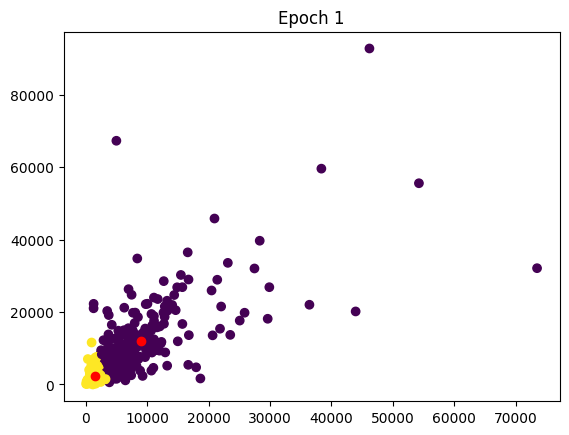

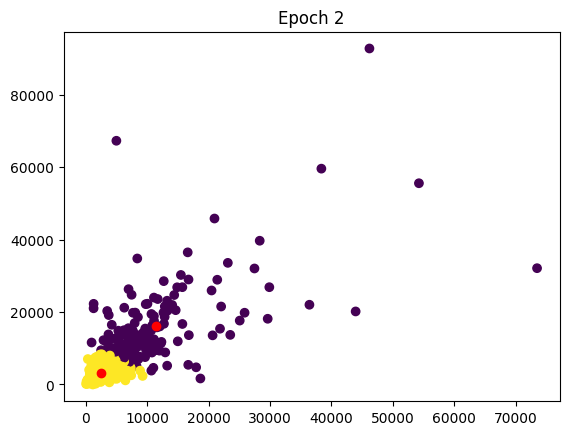

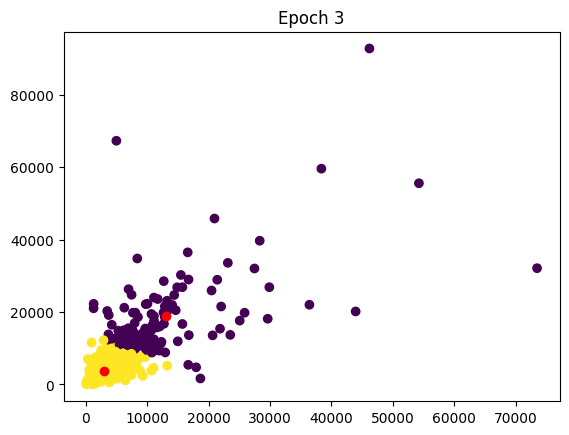

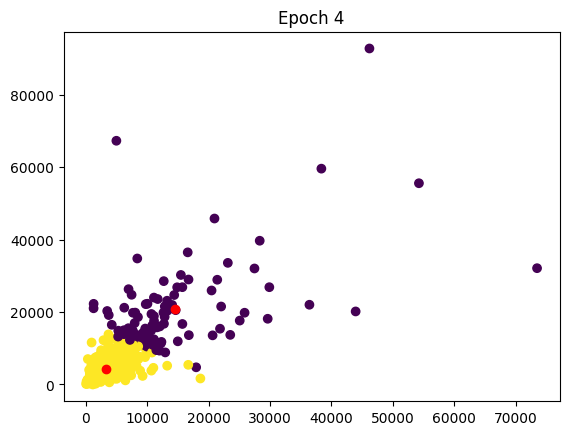

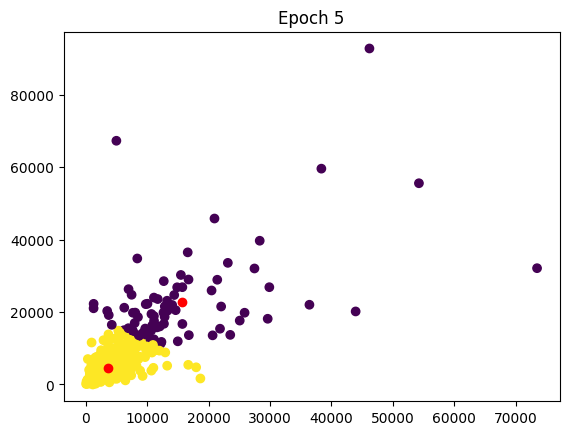

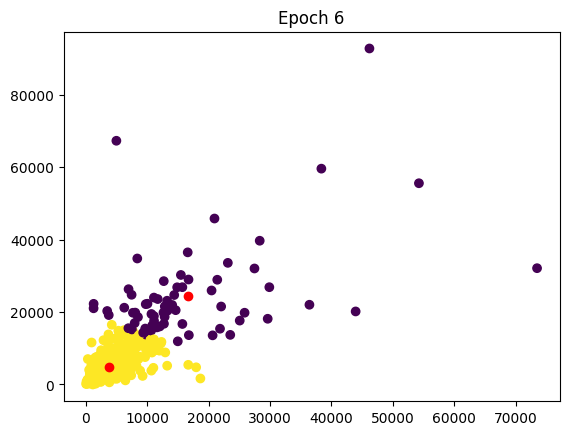

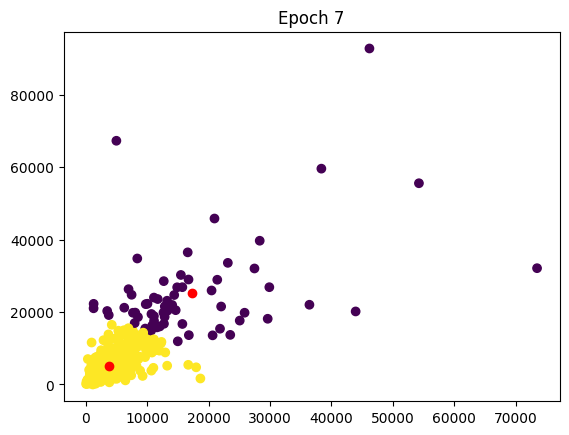

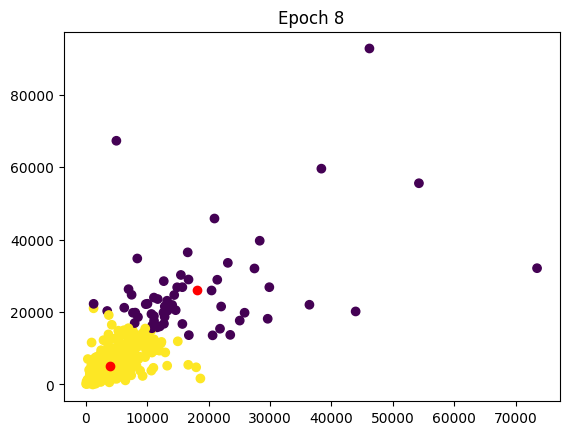

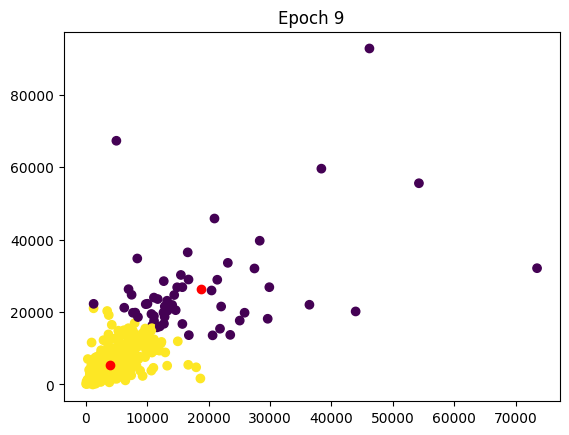

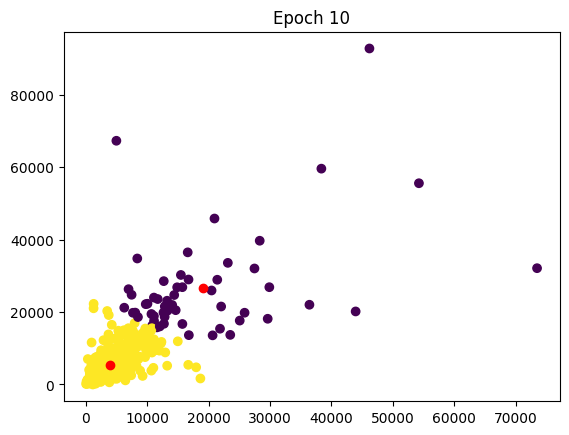

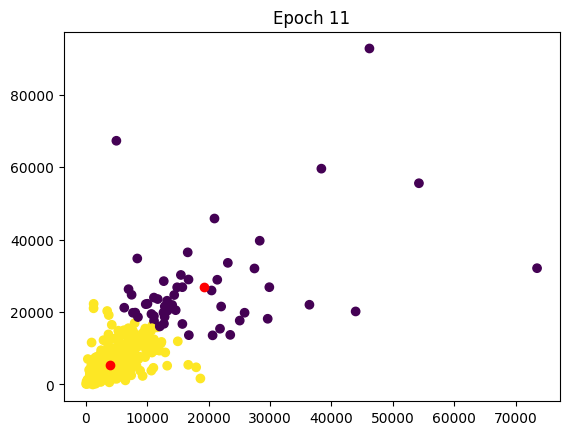

Converged at iteration 12
[[19325 26933]
 [ 3943  5351]]
[1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1]


In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing required dataset
df = pd.read_csv('Wholesale customers data.csv')
print(df.head(5))
print(df.describe())
print(df.info())
df = df.iloc[:, [3, 4]].values # Selecting Annual Income (k$) and Spending Score (1-100) for clustering

# Specifying initial parameters for number of clusteroids
K_ = 2
epochs = 100
m = df.shape[0]
centroids = df[np.random.choice(m, K_, replace = False)] # Random Initialization
exit = 0 # Default

# Determining closest cluster to training example
def closest_cluster(x, clusteroids, epoch, K, exit):
  c =  np.zeros(m, dtype = int) # Index array of length m

  for j in range(epoch + 1):
    old_centroids = clusteroids.copy() # Keep record of old centroids

    if(exit == 1):
      break

    for i in range(m):
      c[i] = np.argmin(np.linalg.norm(x[i] - clusteroids, axis = 1))

    for k in range(K):
      clusteroids[k] = np.mean(x[c == k], axis = 0)

    # Comparing difference between the old and new centroid values
    shift = np.linalg.norm(clusteroids - old_centroids)

    # Cecking if centroid position has updated or not
    if shift < 1e-4:
      print(f"Converged at iteration {j+1}")
      exit = 1
      break

    # Plot of clusters
    plt.scatter(x[:, 0], x[:, 1], c = c)
    plt.scatter(clusteroids[:, 0], clusteroids[:, 1], c = 'red')
    plt.title(f"Epoch {j+1}")
    plt.show()

  return clusteroids, c

# Calling function
final_centroids, final_clusters = closest_cluster(df, centroids, epochs, K_, exit)
print(final_centroids)
print(final_clusters)

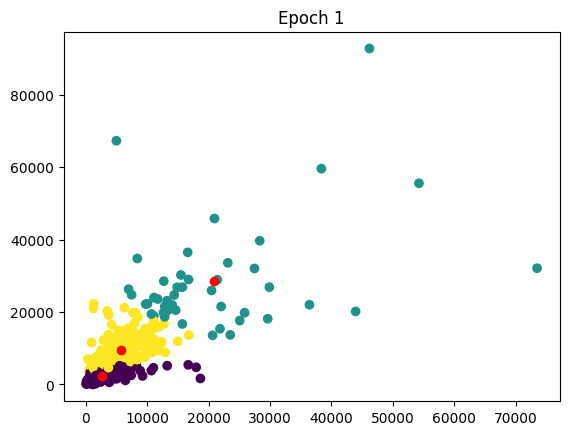

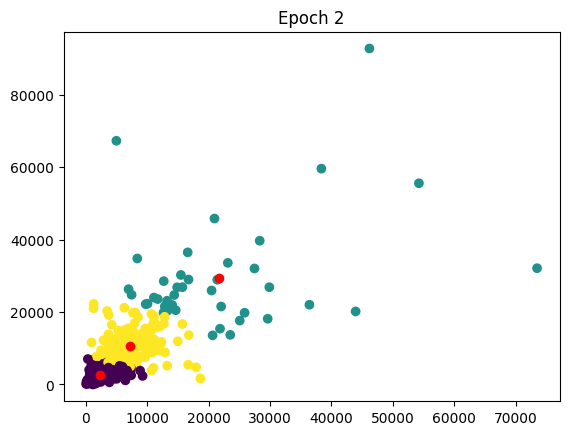

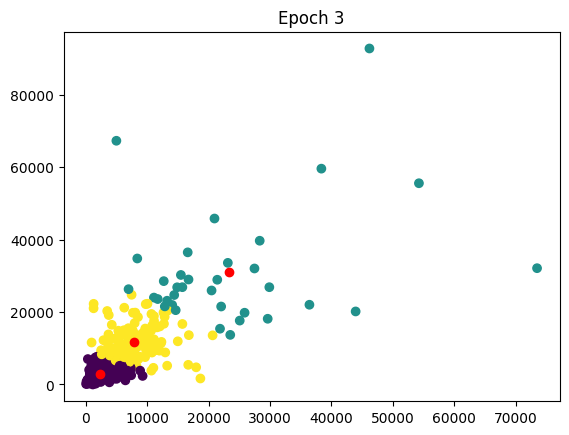

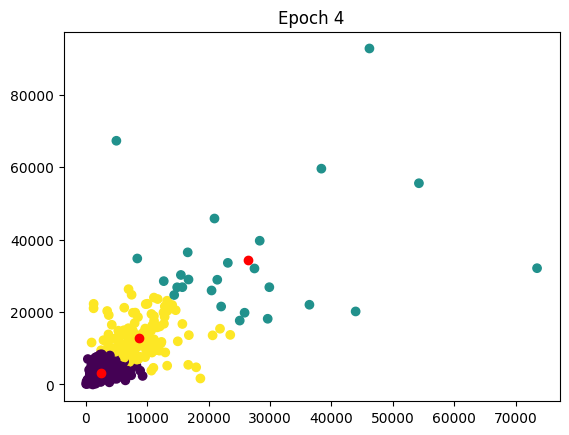

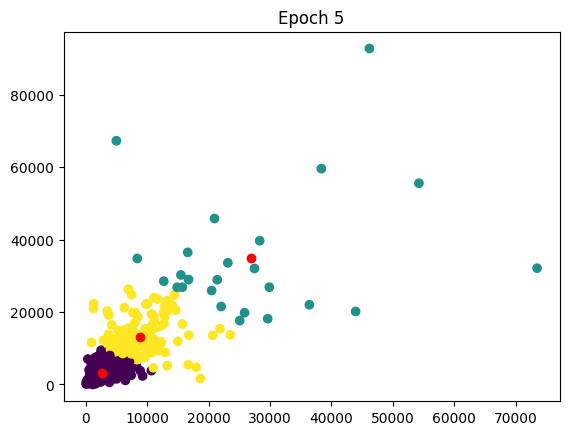

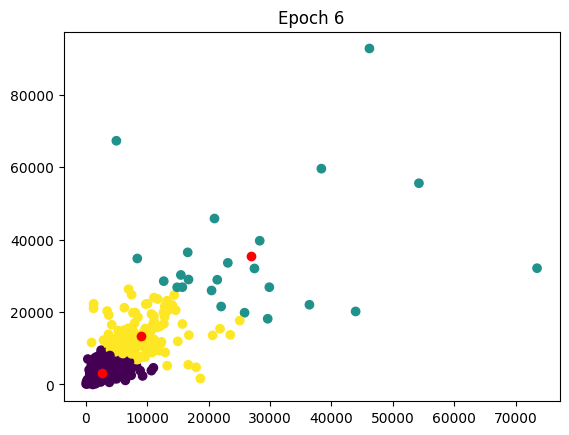

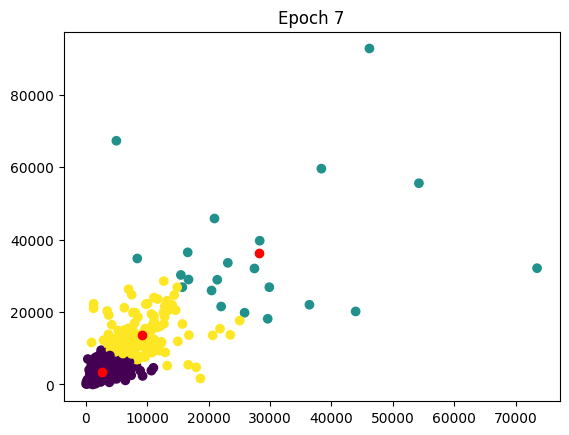

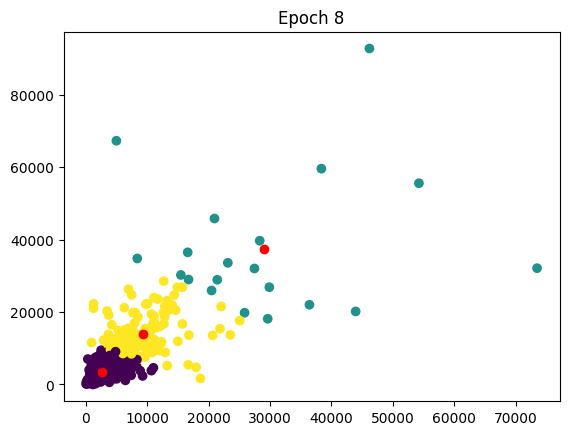

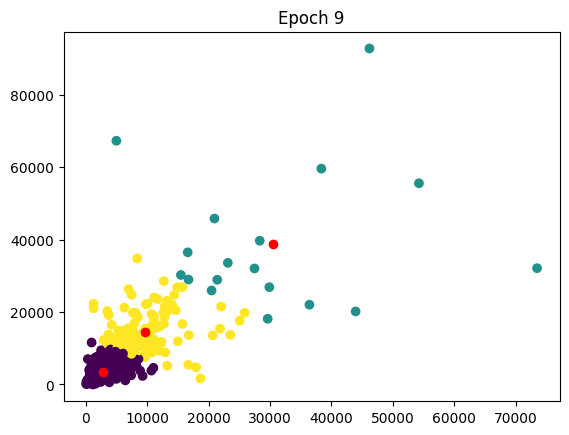

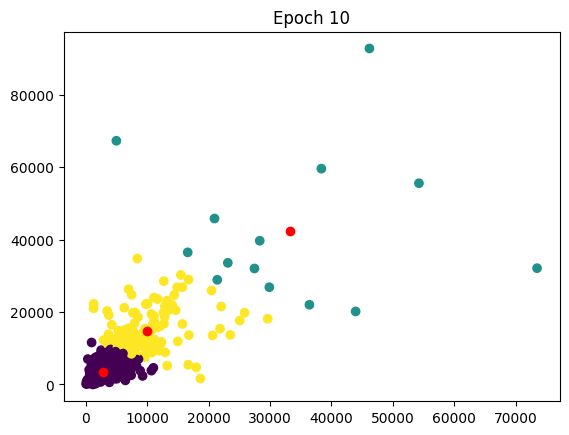

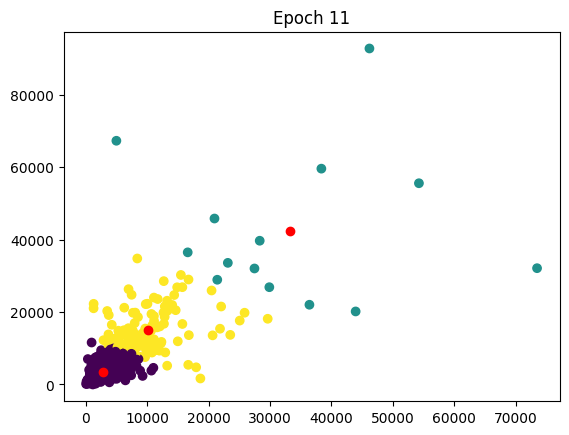

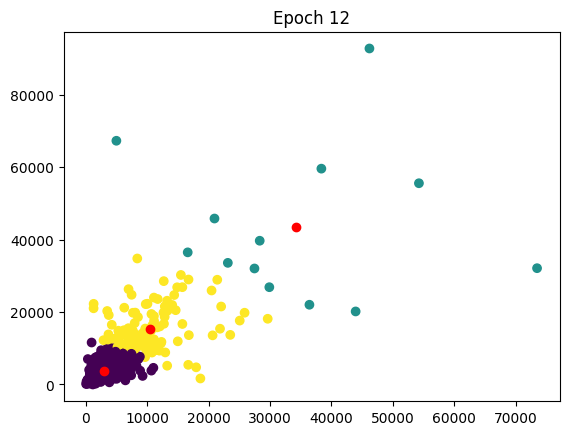

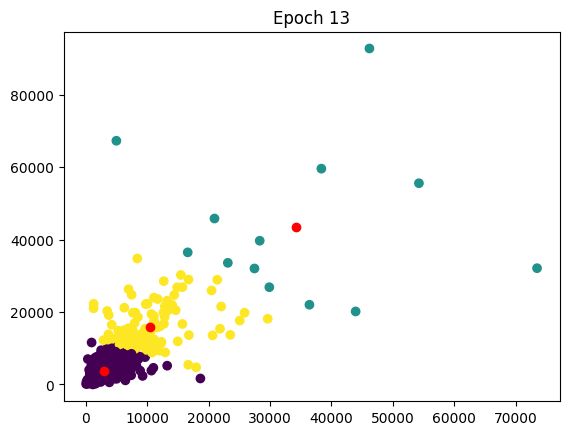

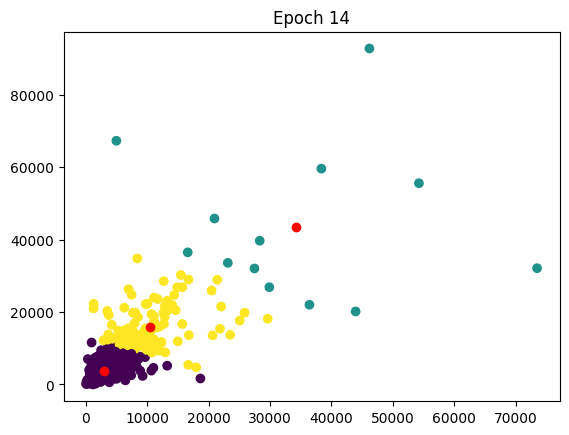

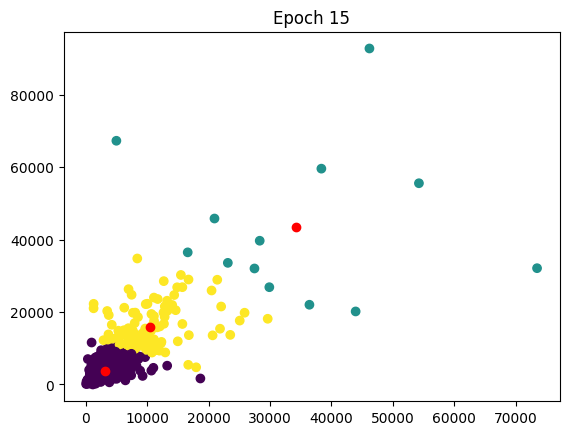

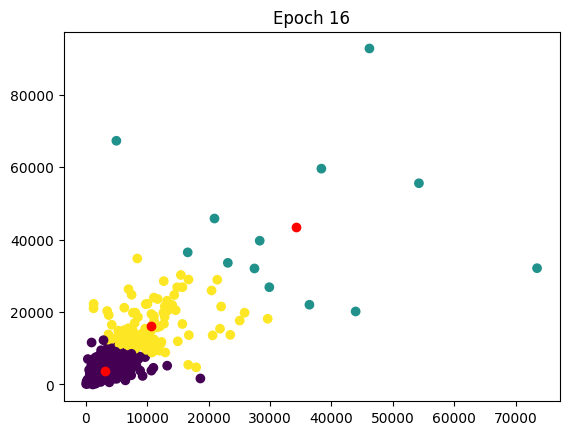

Converged at iteration 17


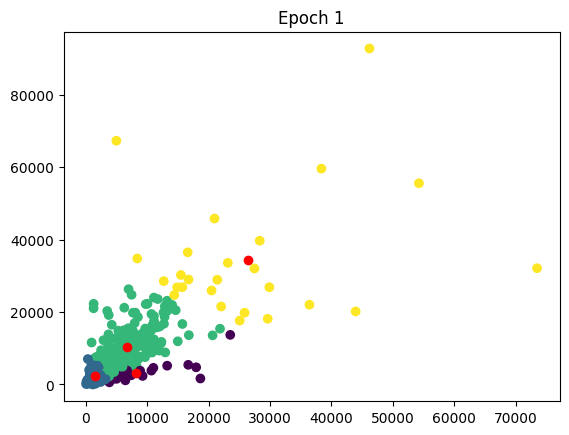

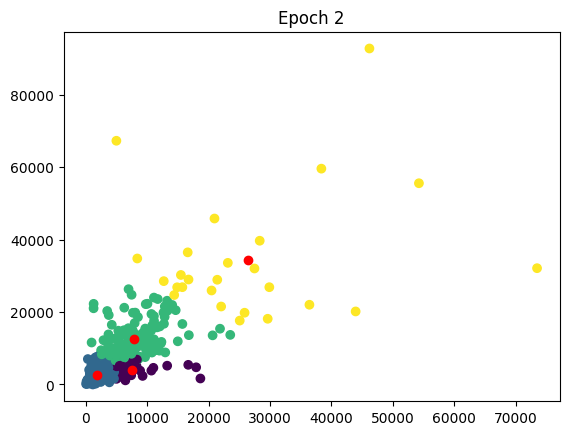

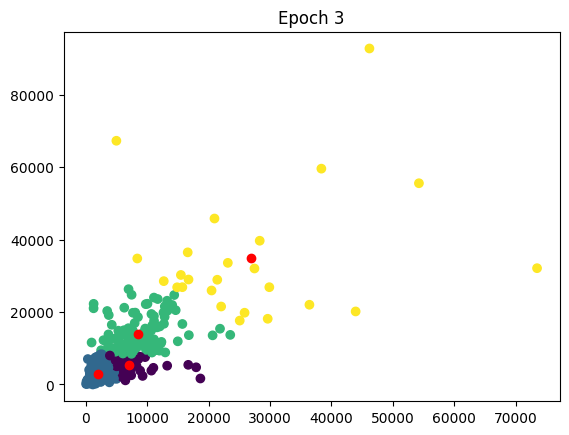

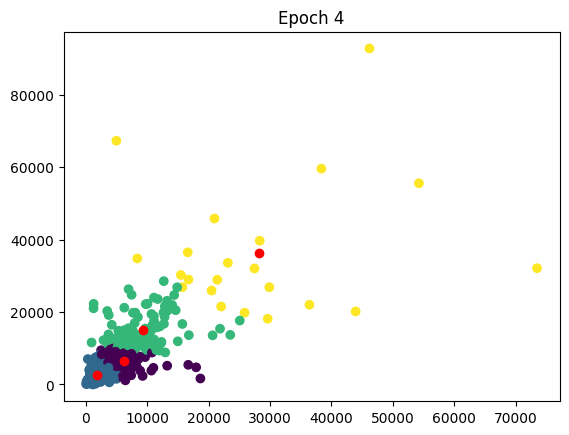

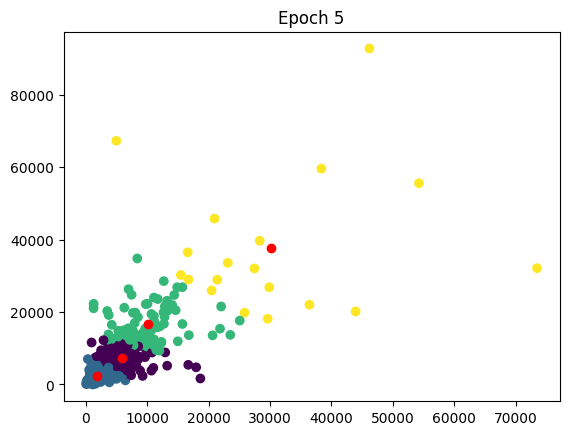

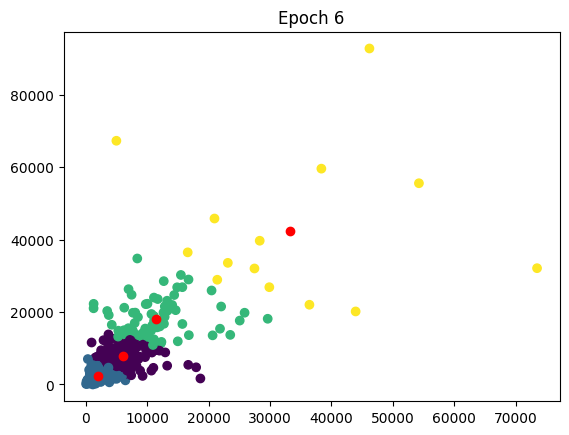

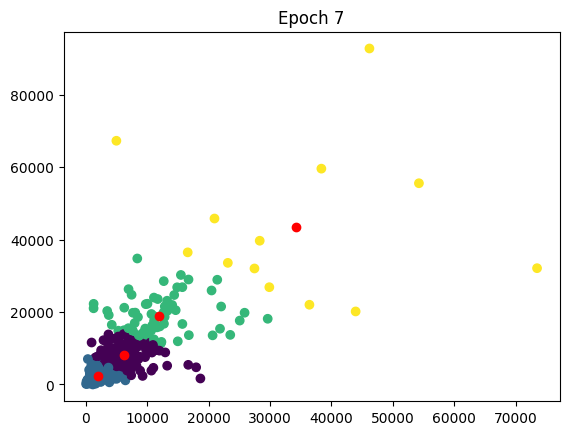

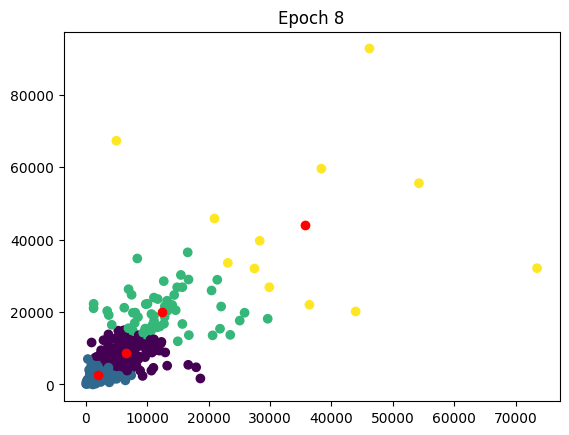

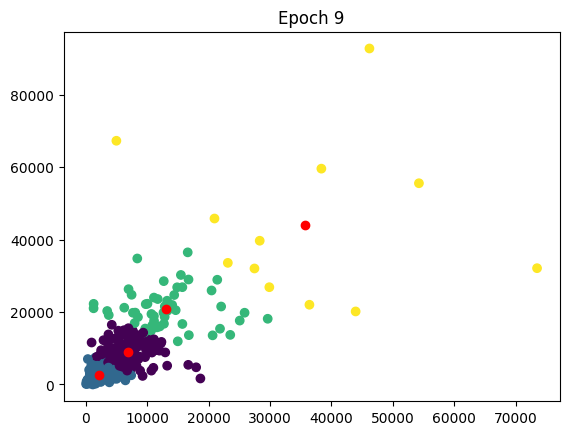

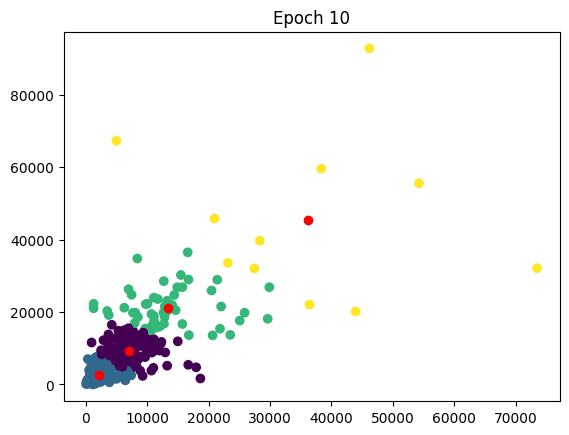

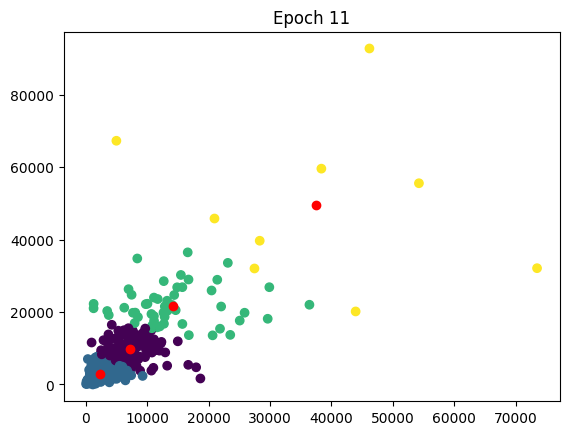

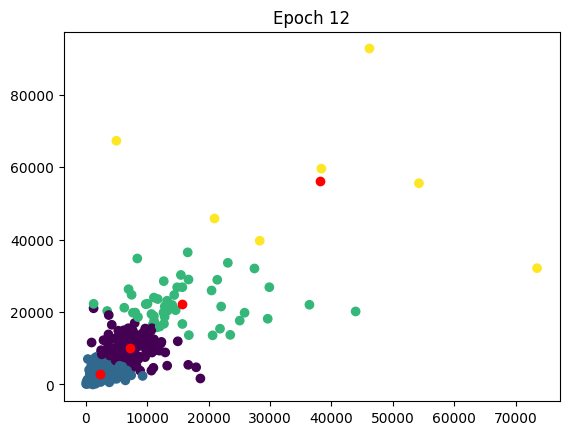

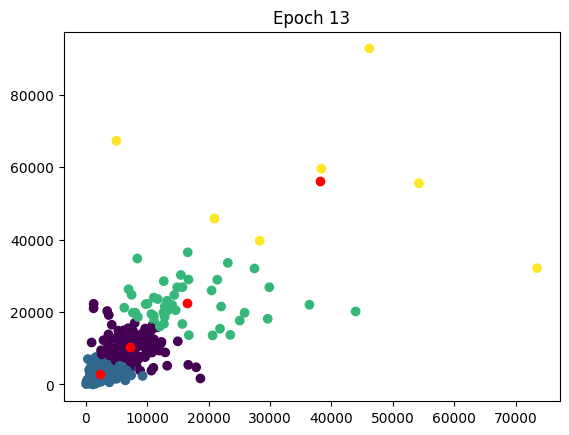

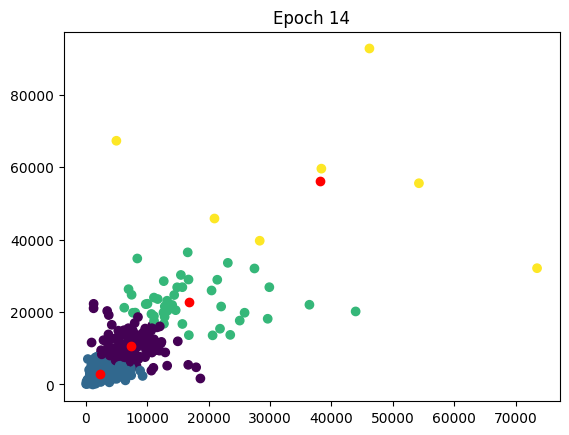

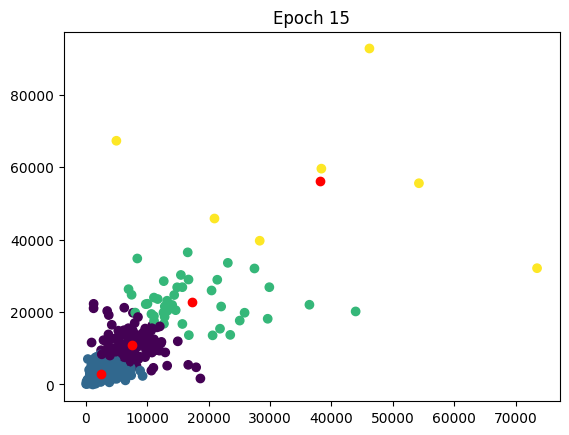

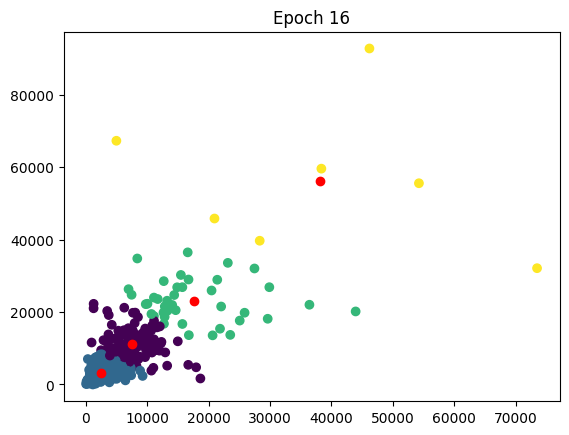

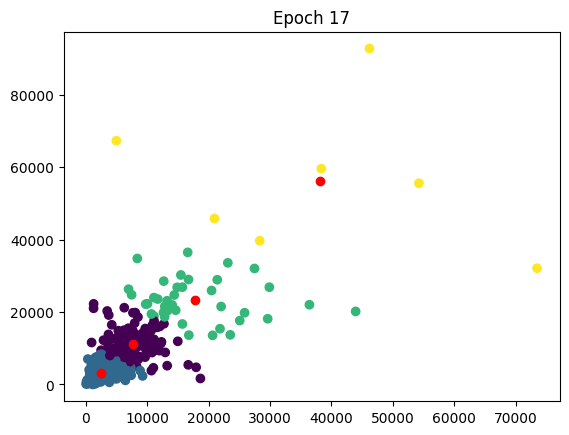

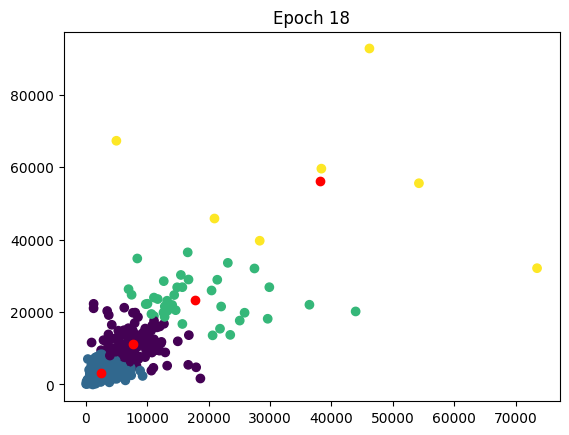

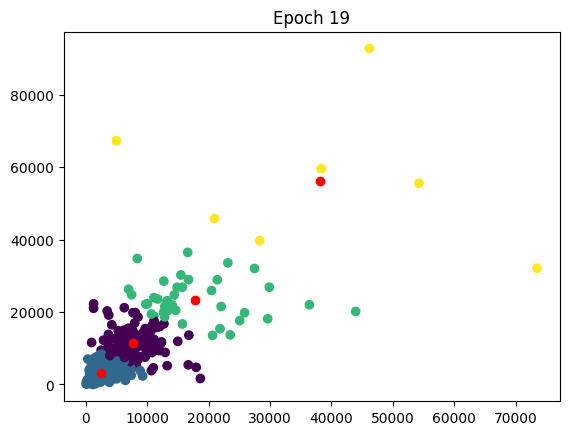

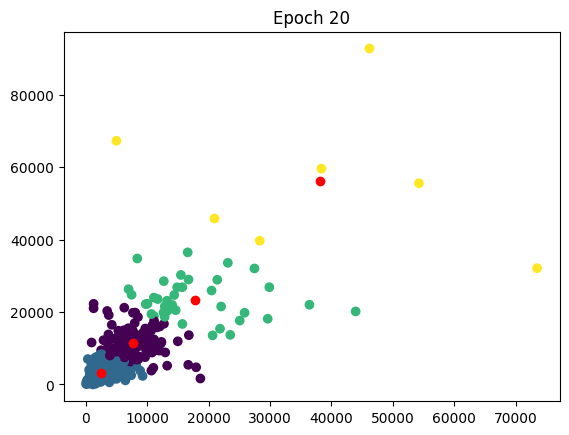

Converged at iteration 21


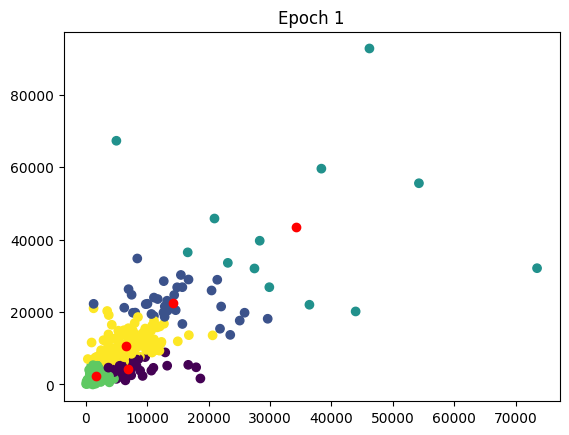

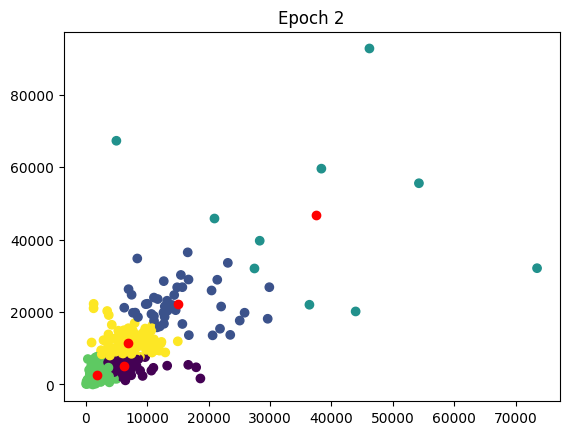

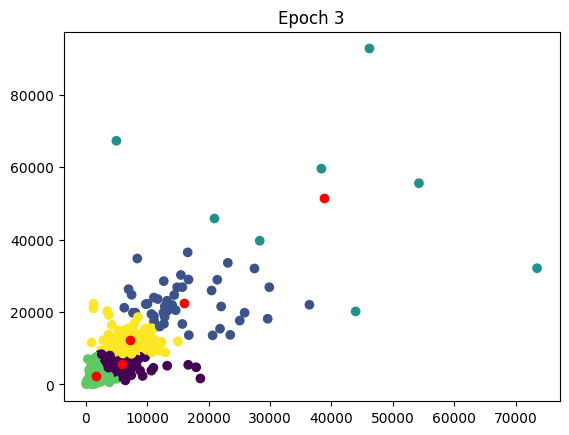

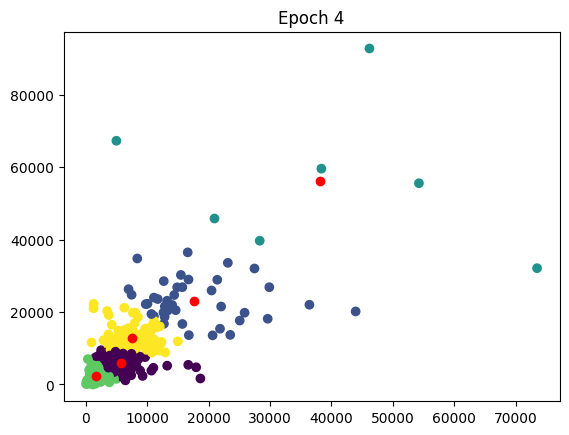

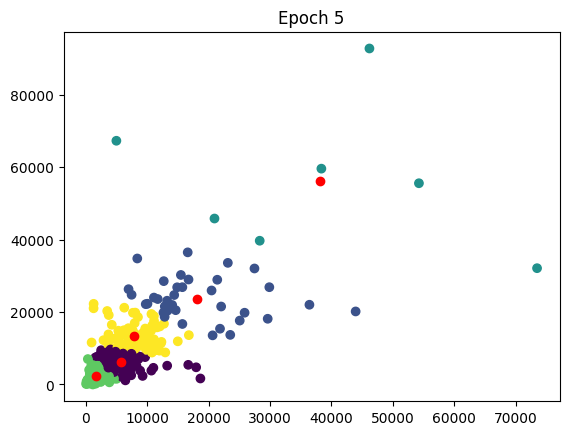

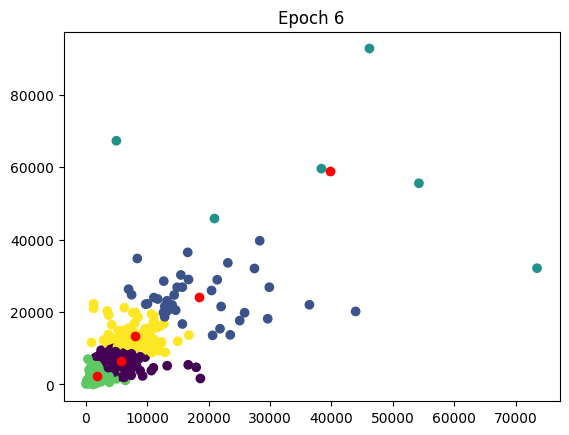

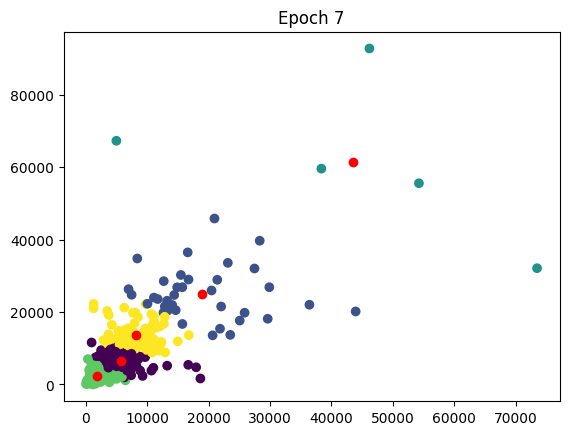

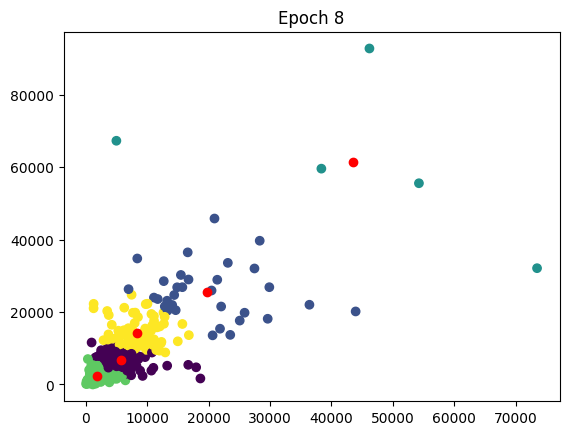

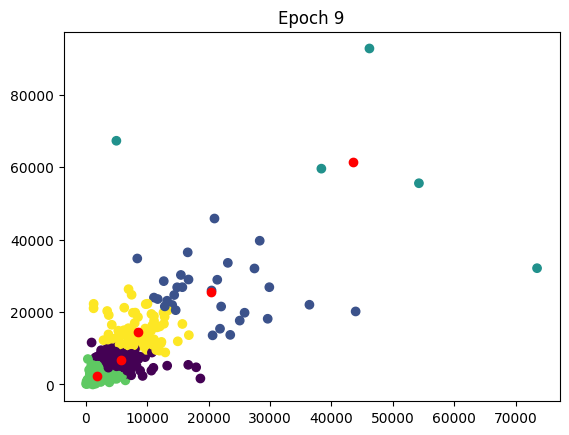

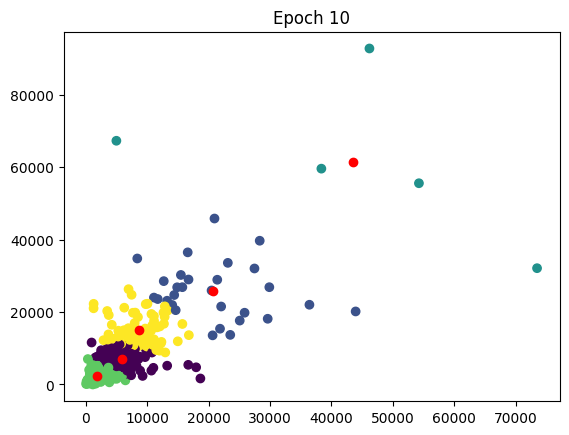

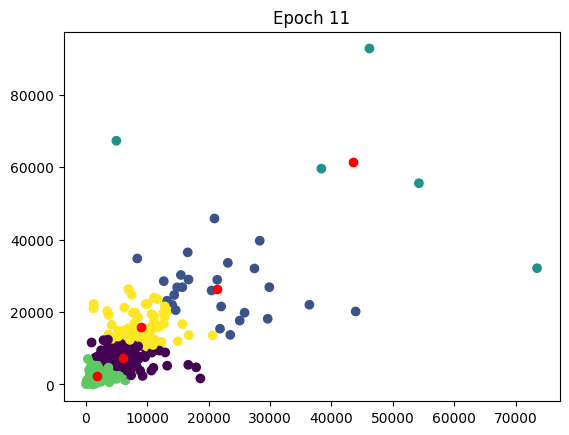

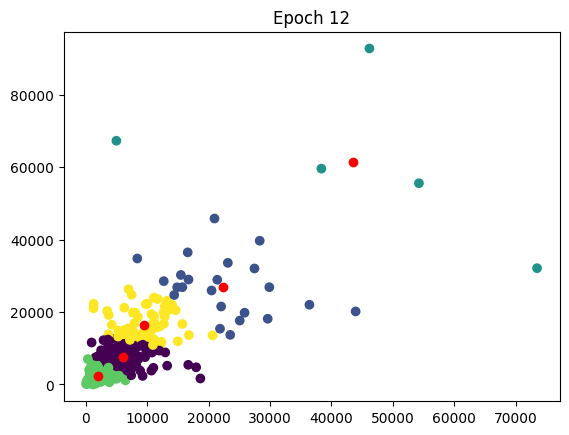

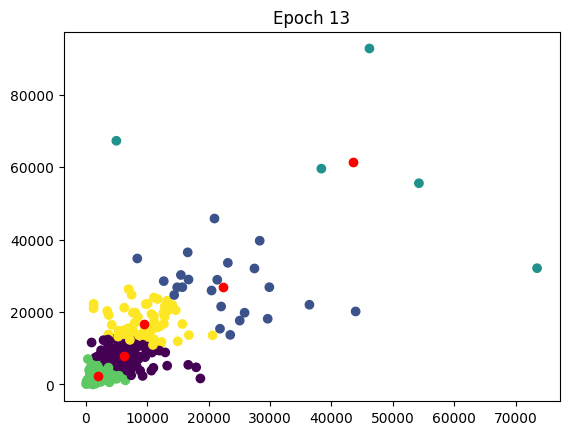

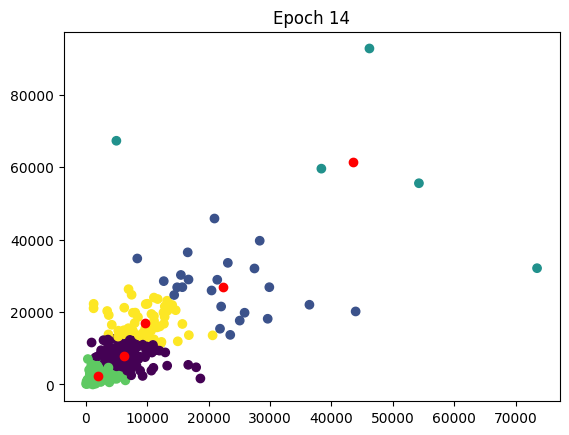

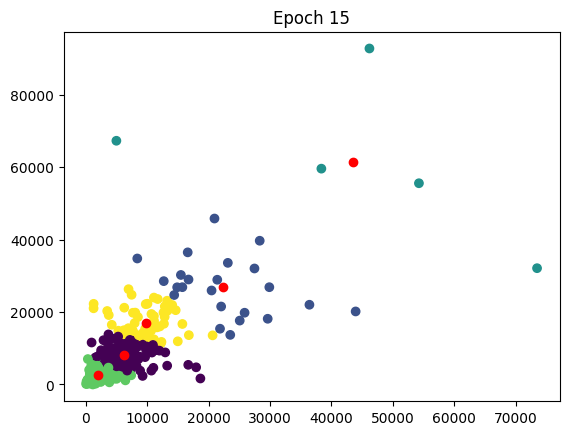

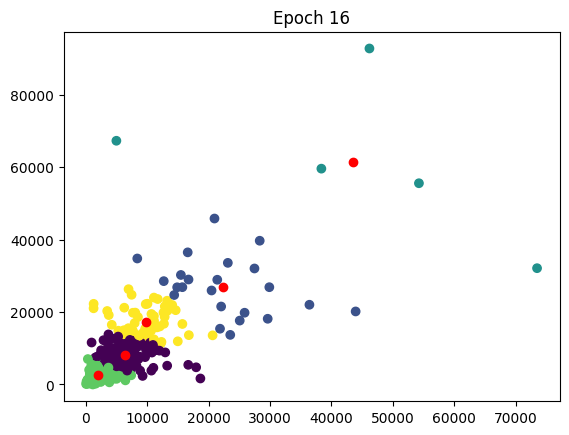

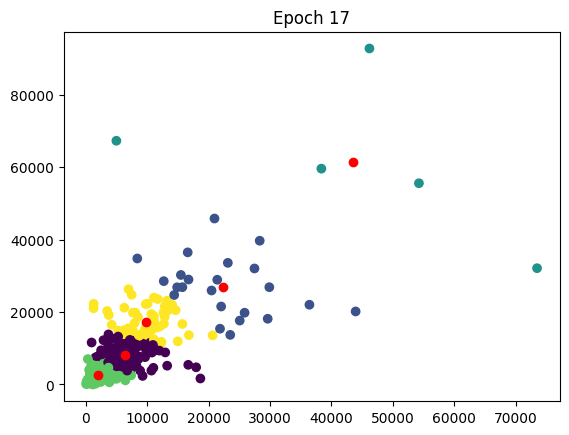

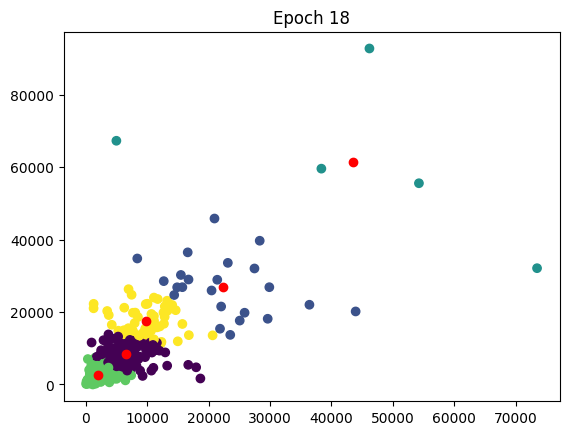

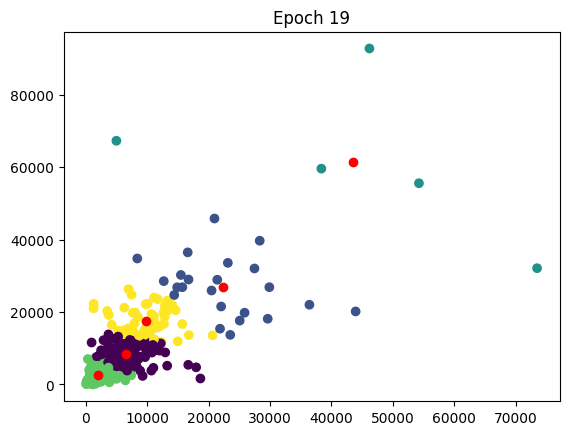

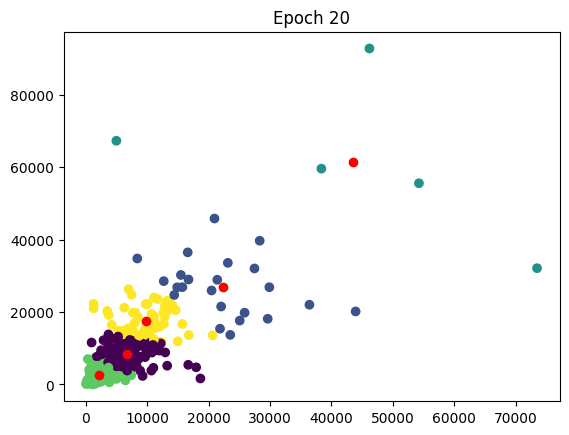

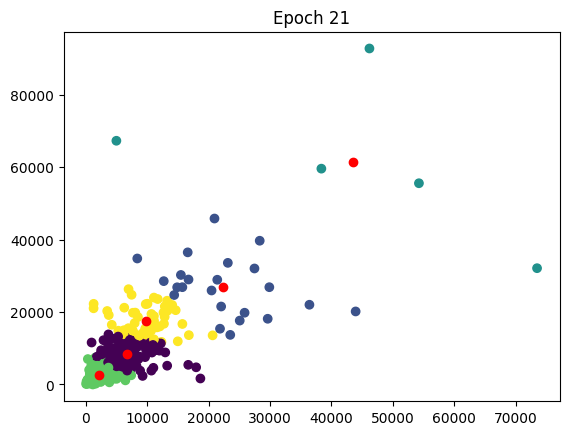

Converged at iteration 22


In [3]:
# Task 2
K_ = [3, 4, 5]

for i in K_:
  centroids = df[np.random.choice(m, i, replace = False)]
  final_centroids, final_clusters = closest_cluster(df, centroids, epochs, i, exit)

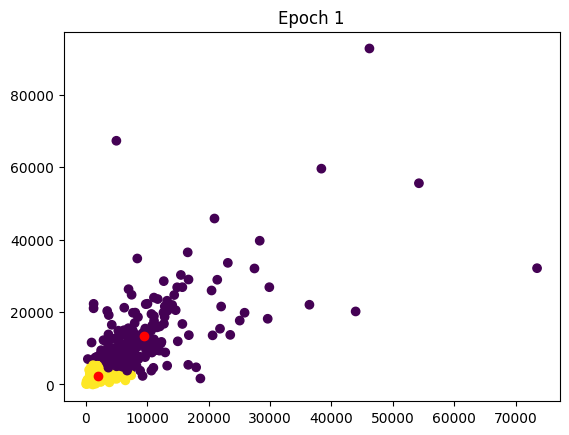

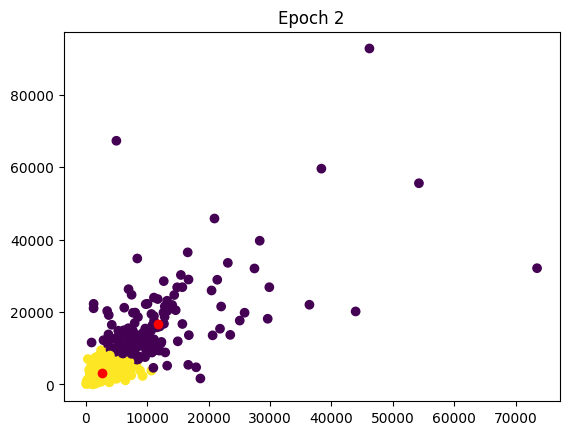

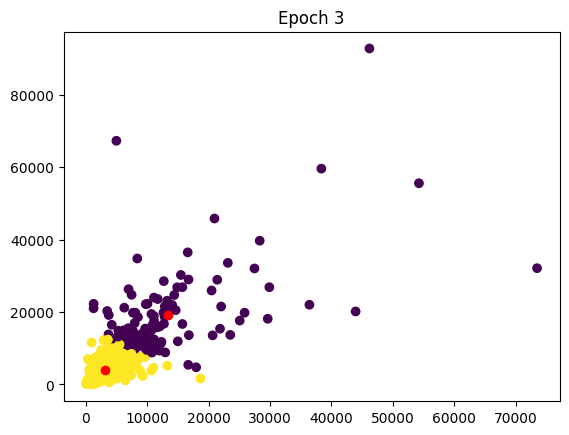

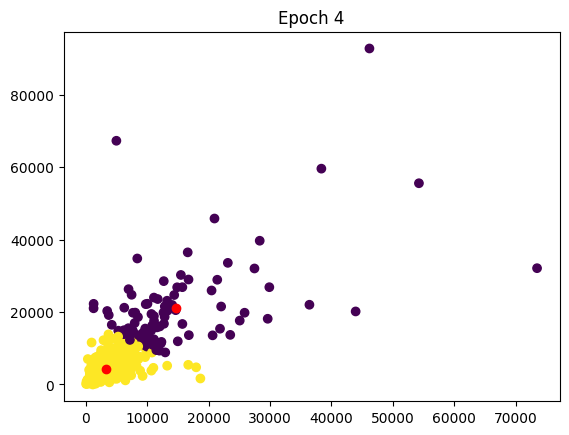

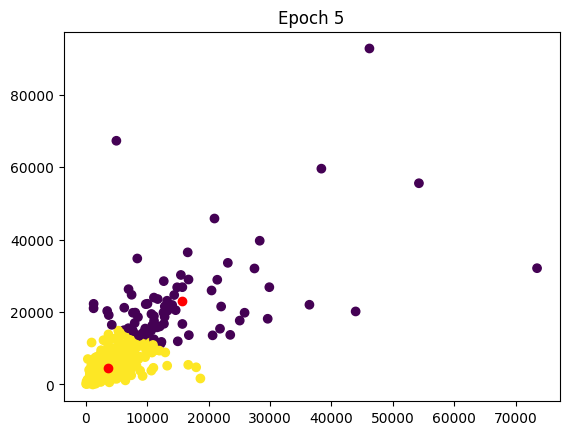

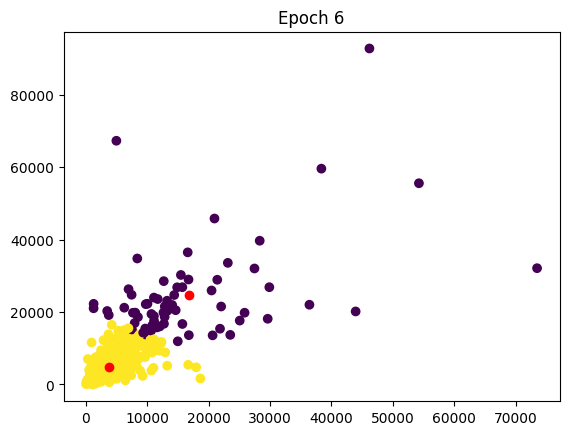

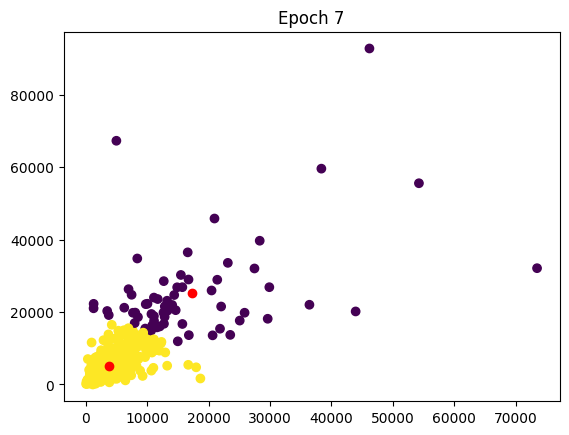

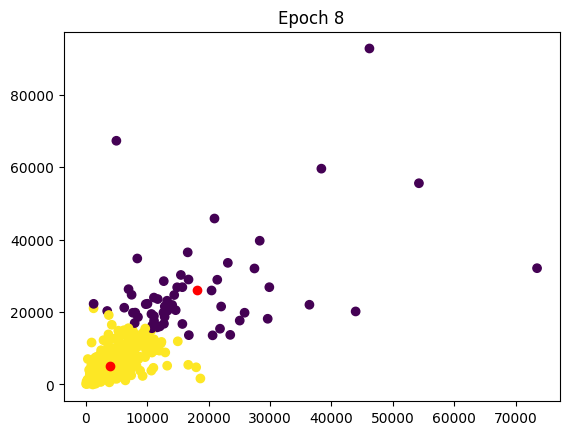

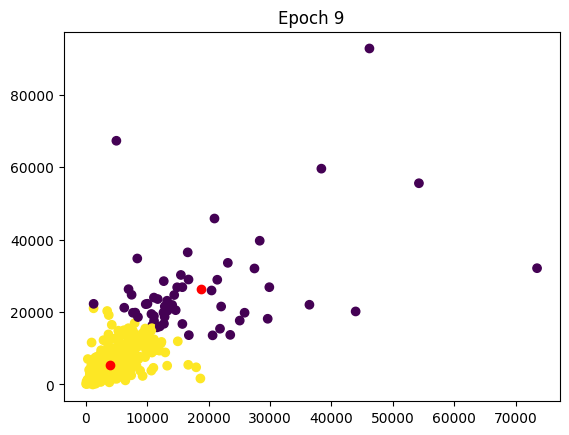

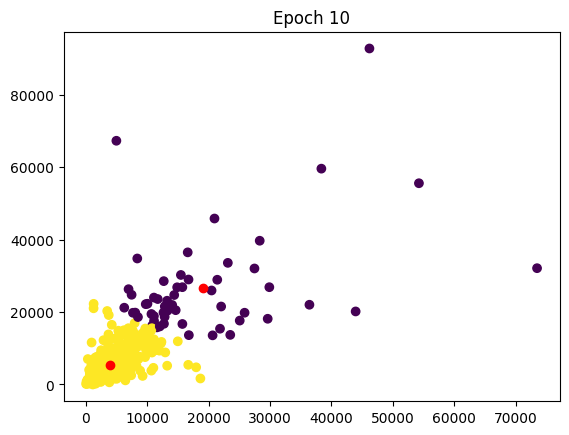

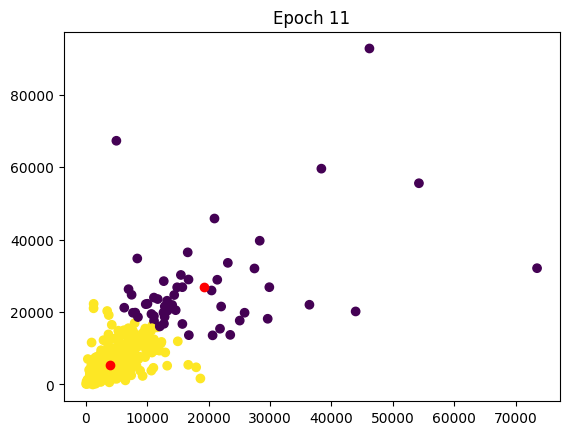

Converged at iteration 12


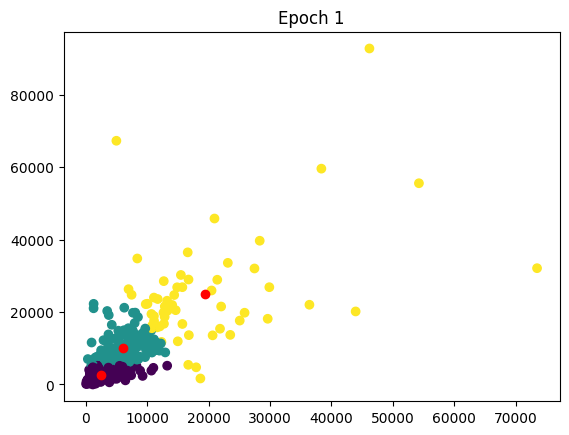

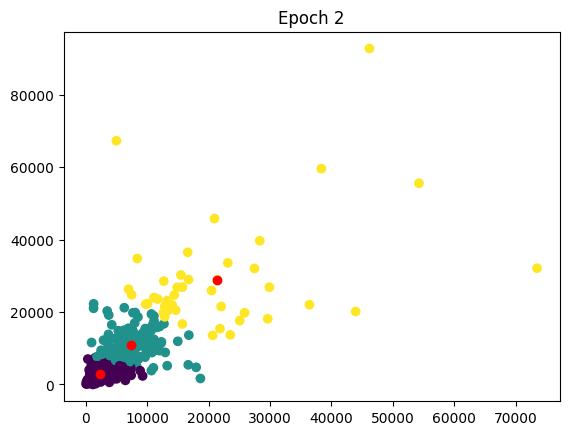

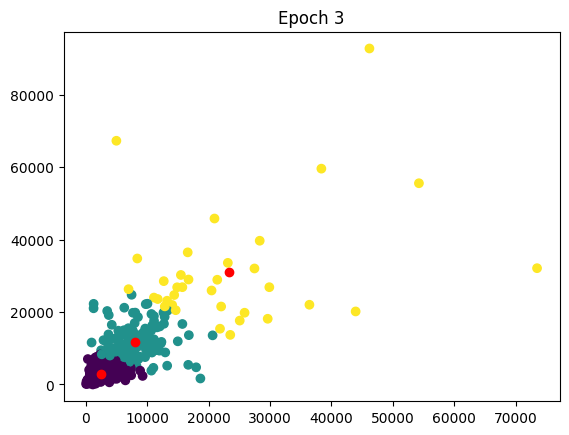

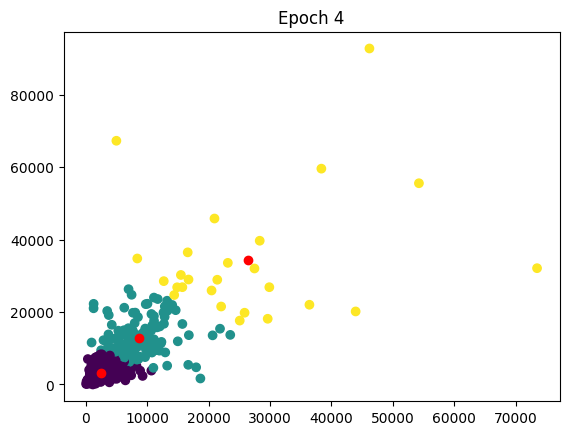

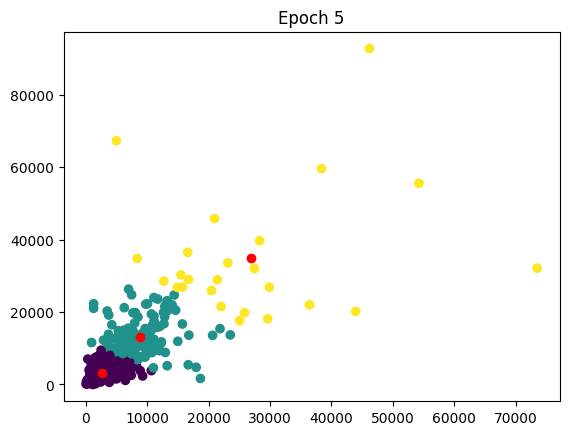

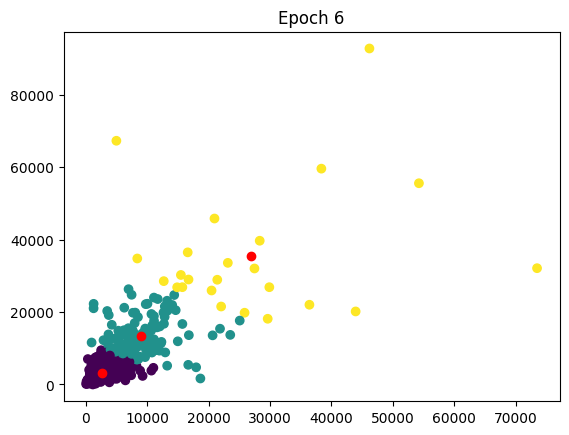

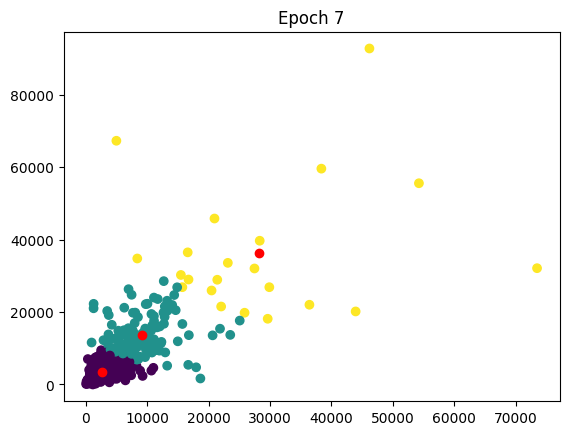

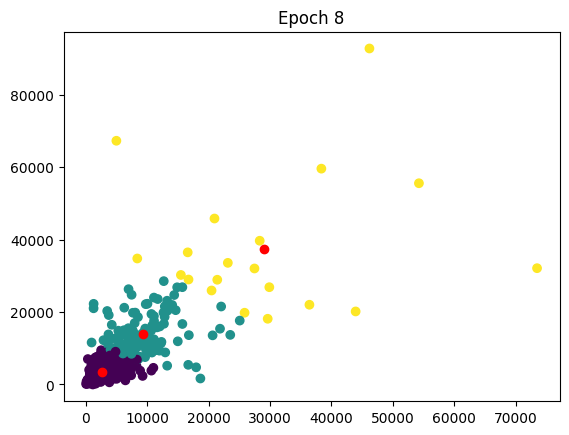

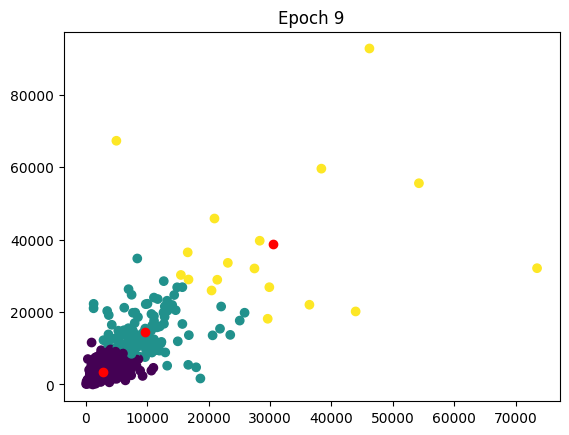

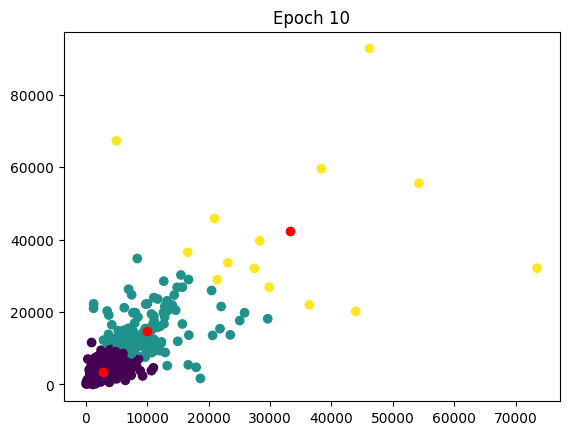

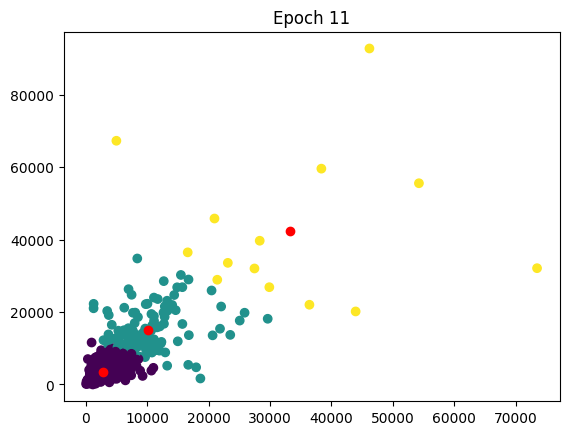

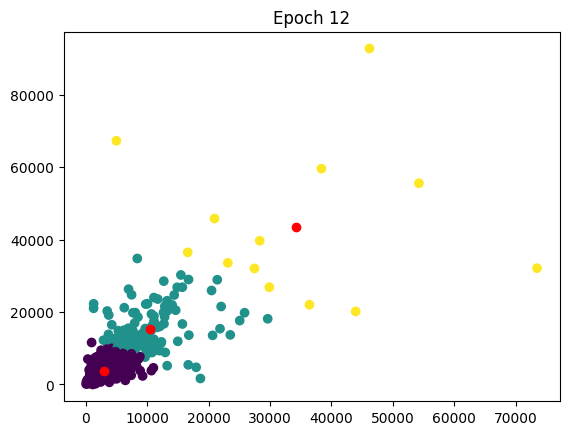

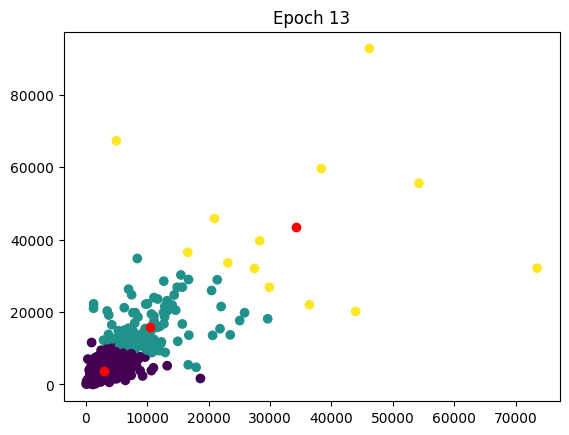

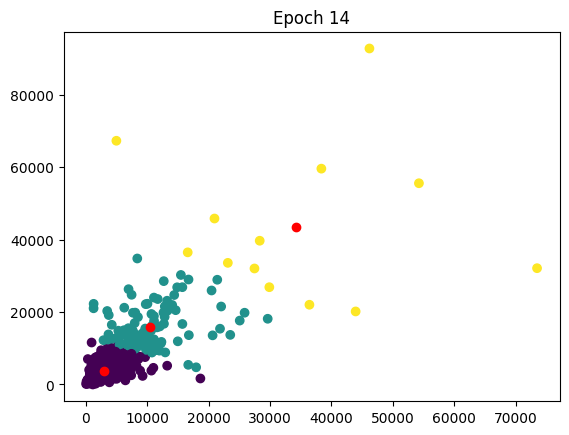

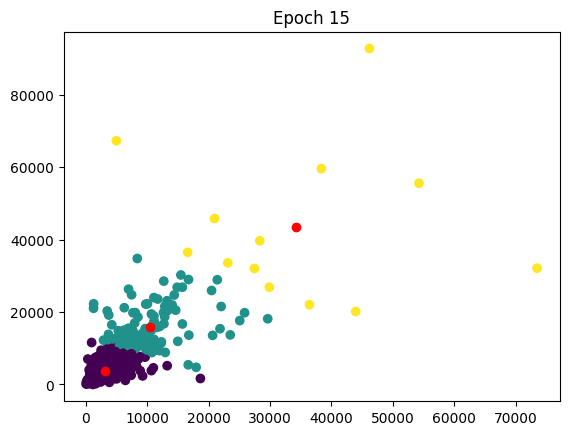

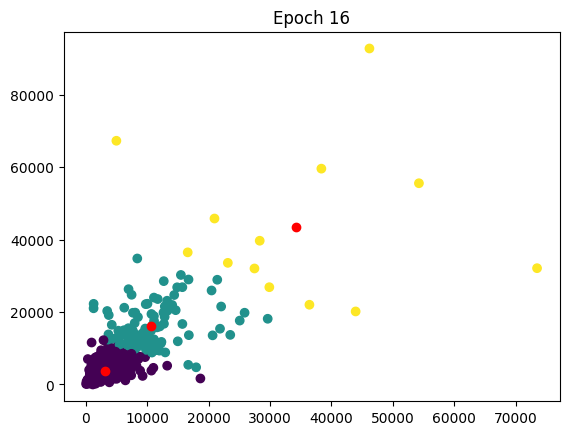

Converged at iteration 17


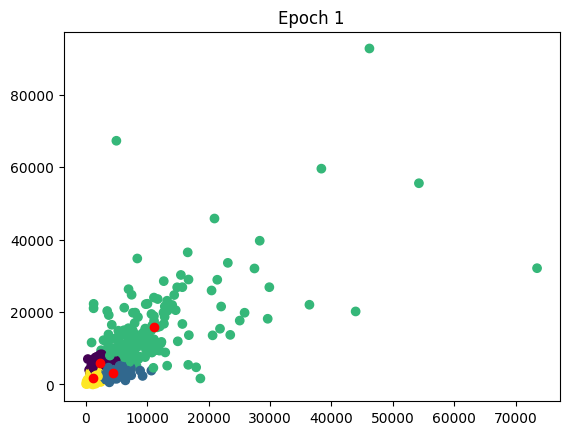

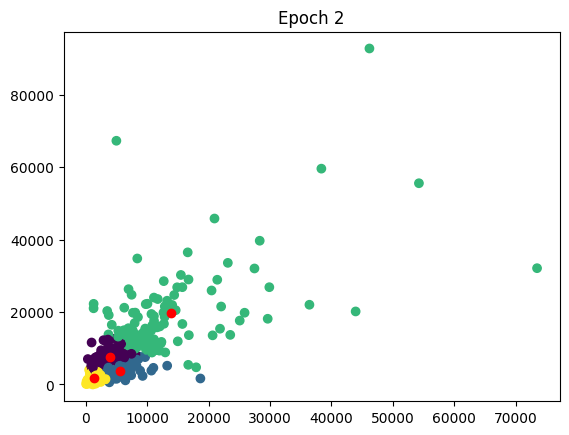

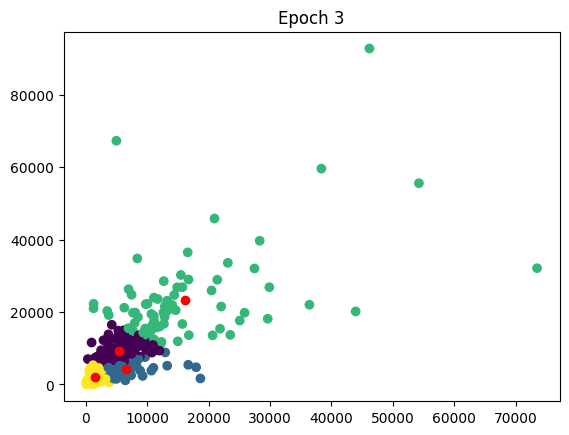

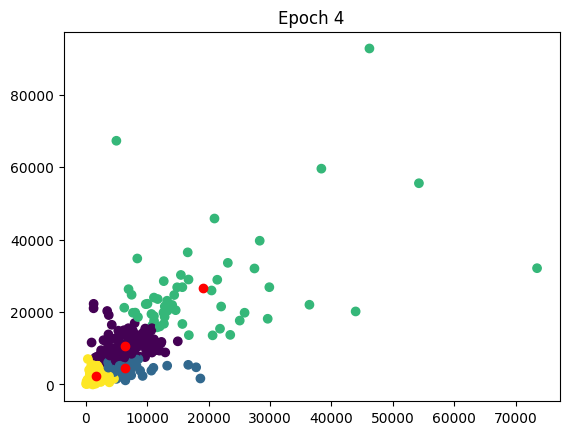

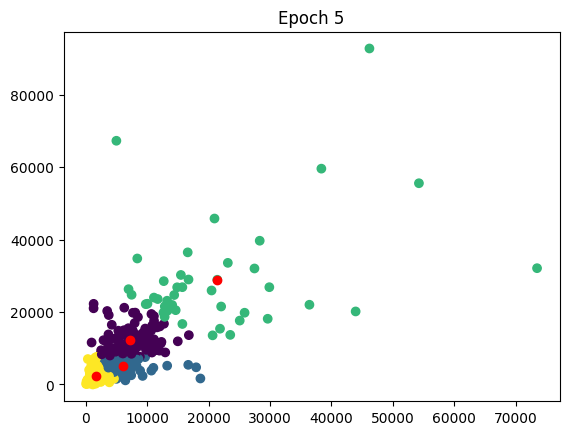

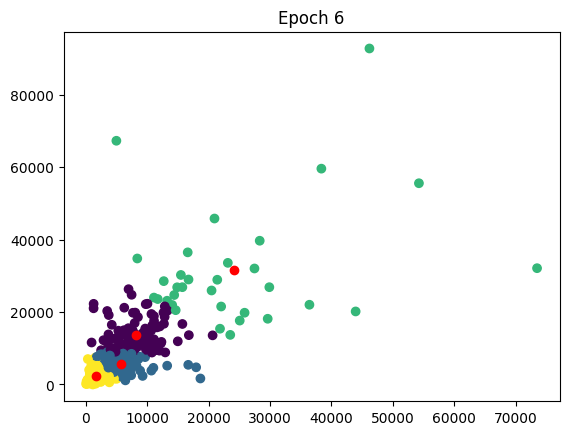

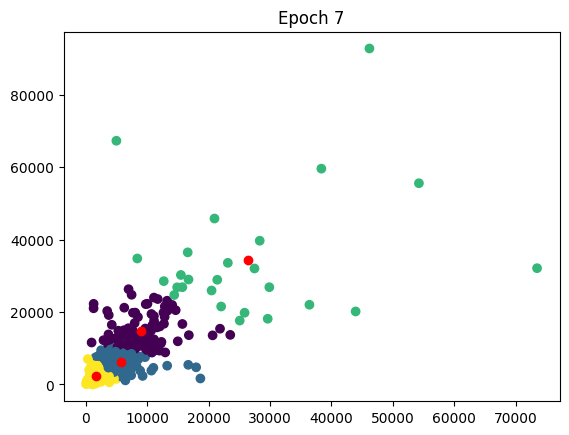

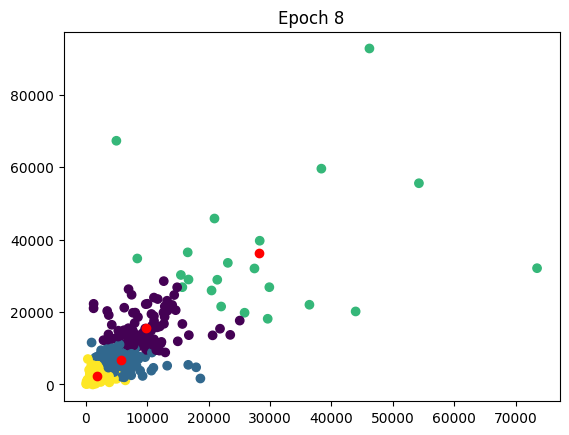

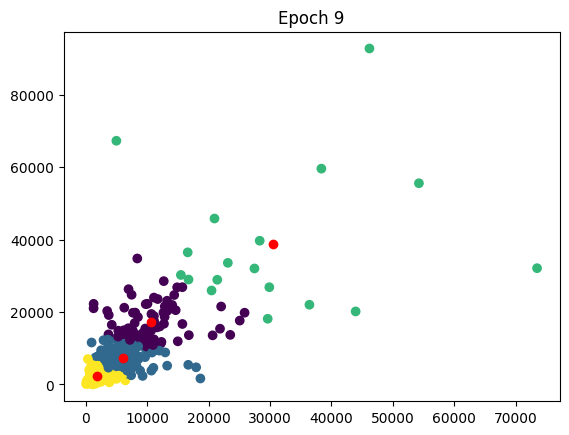

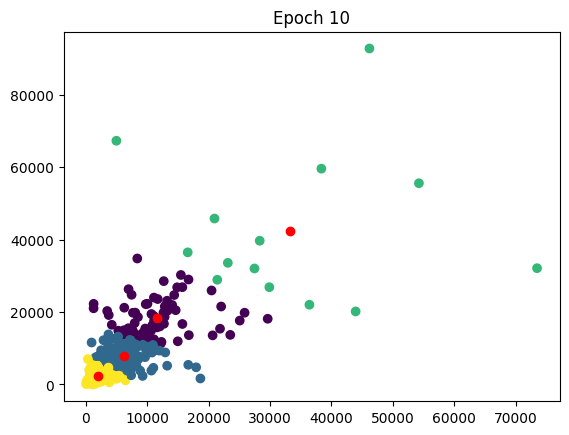

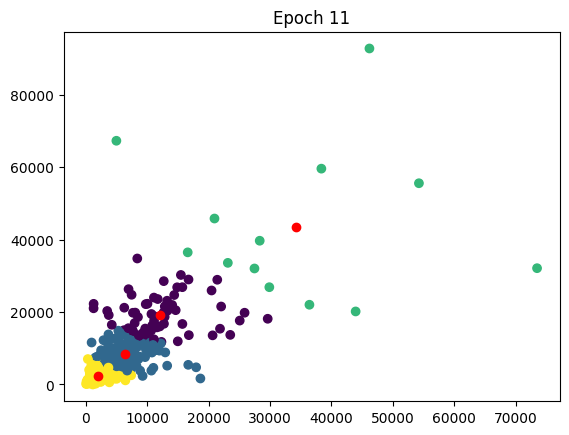

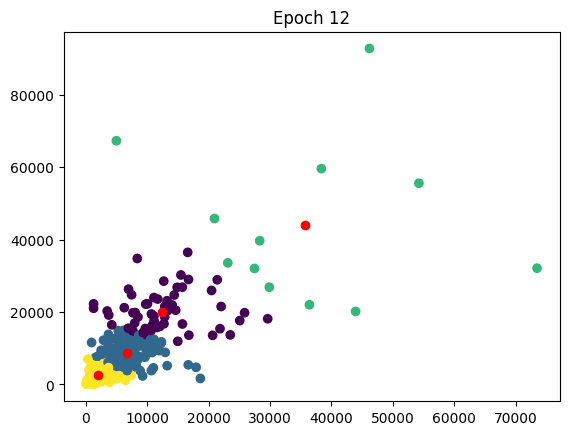

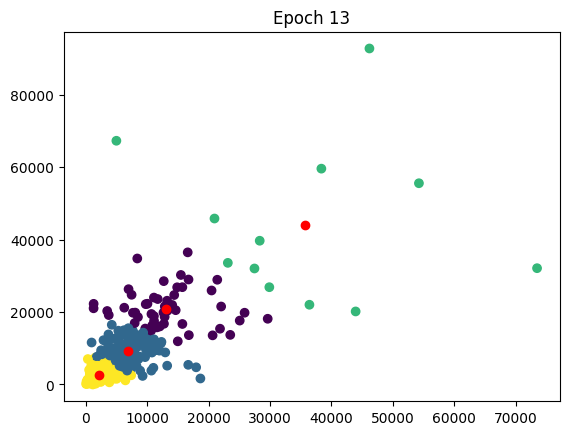

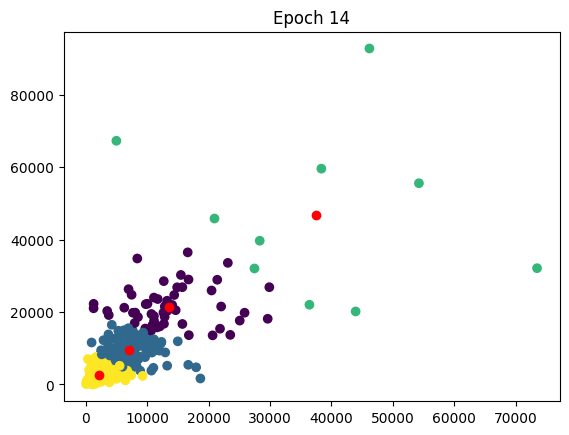

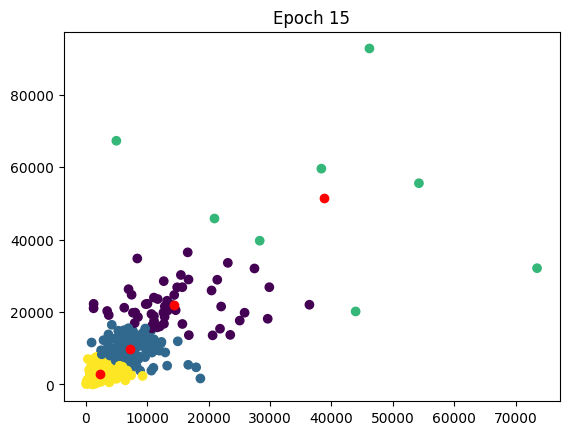

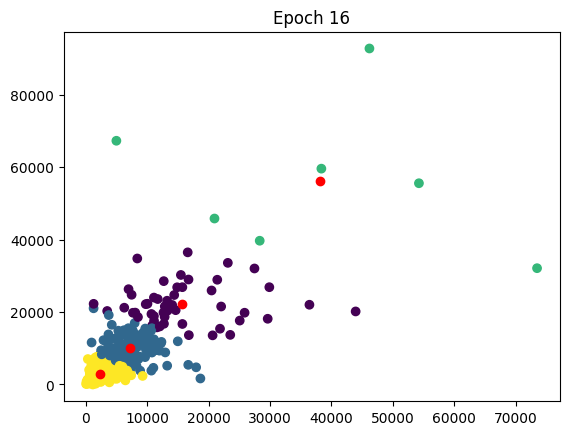

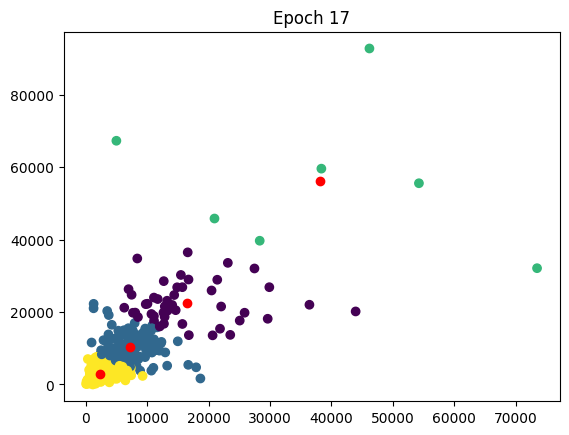

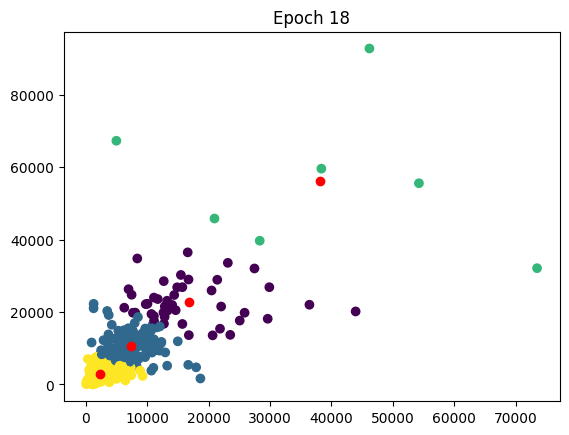

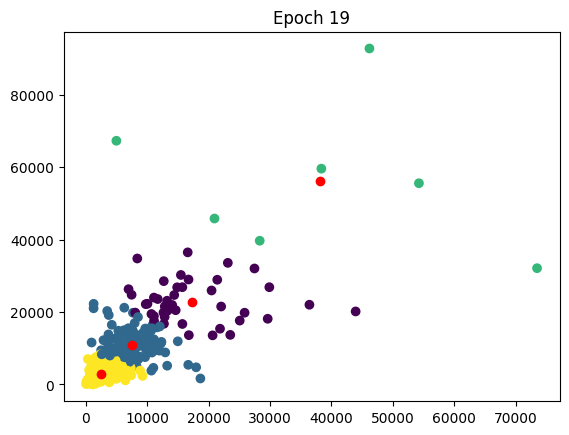

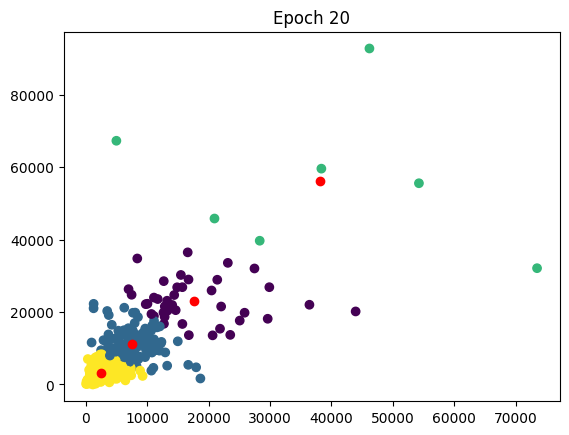

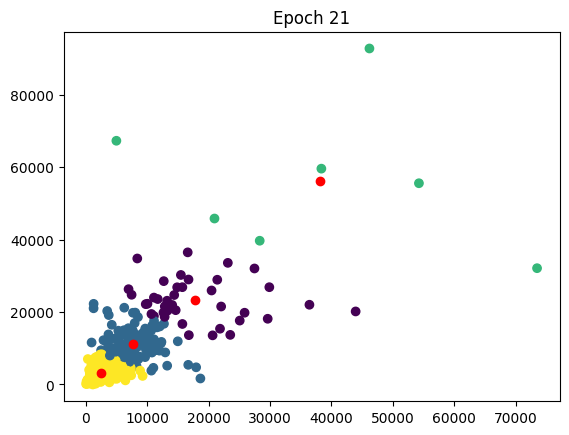

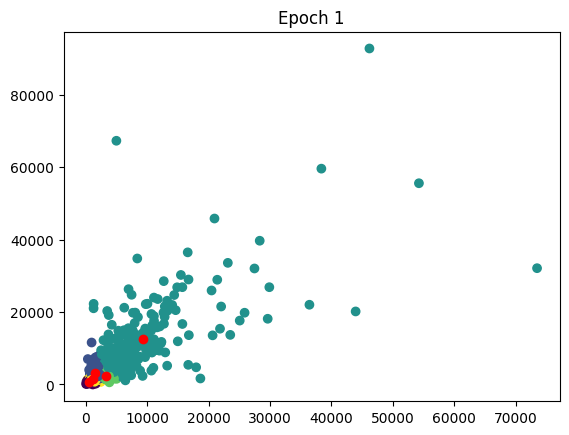

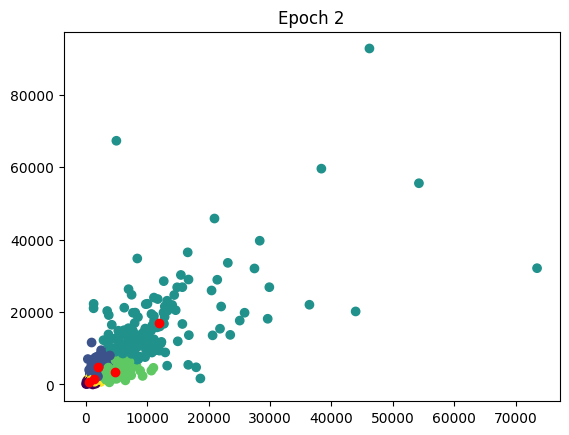

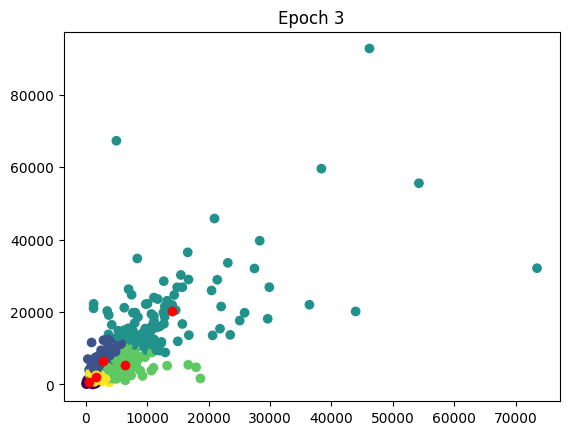

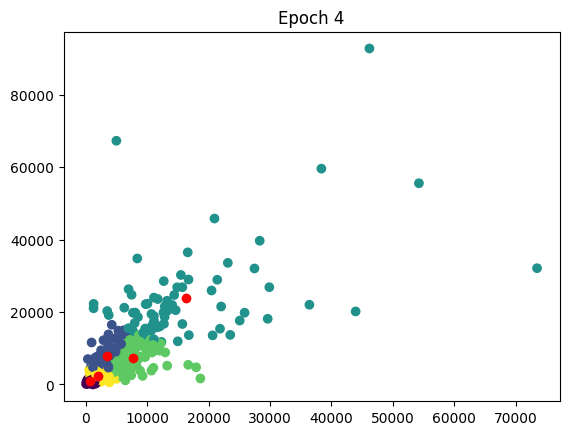

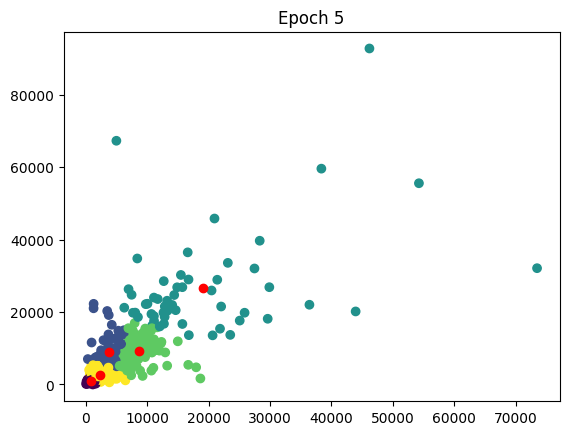

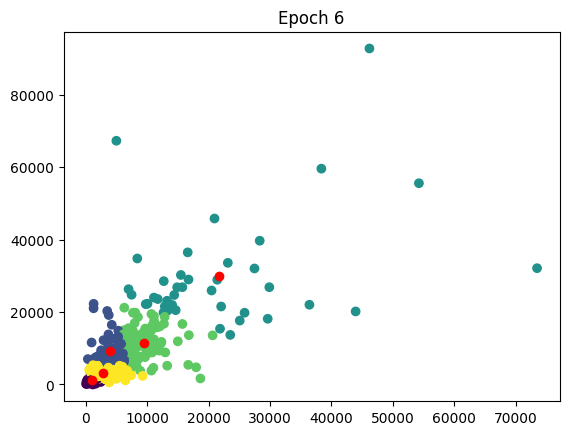

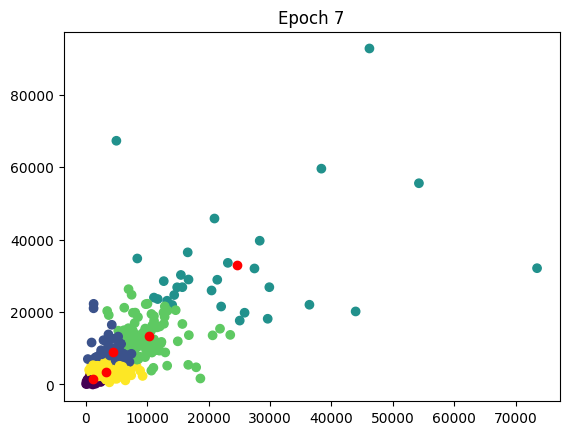

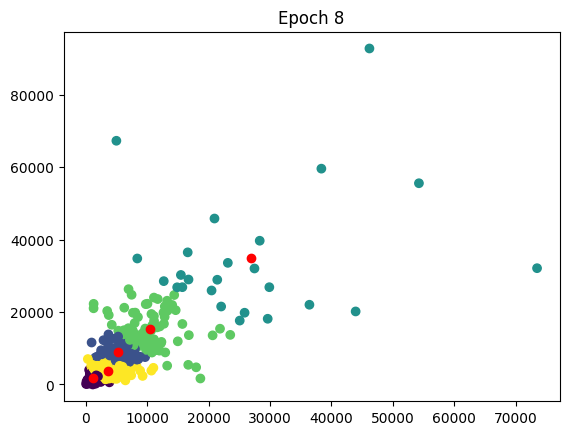

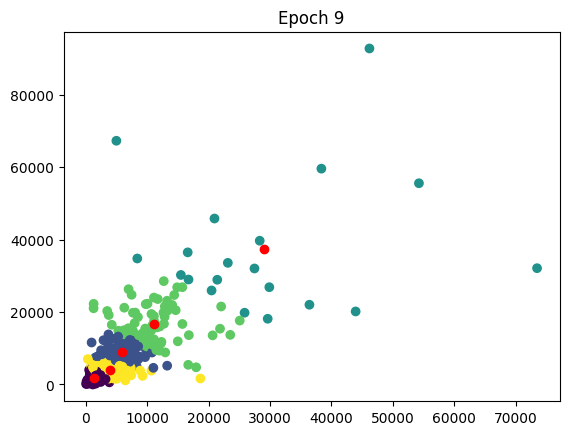

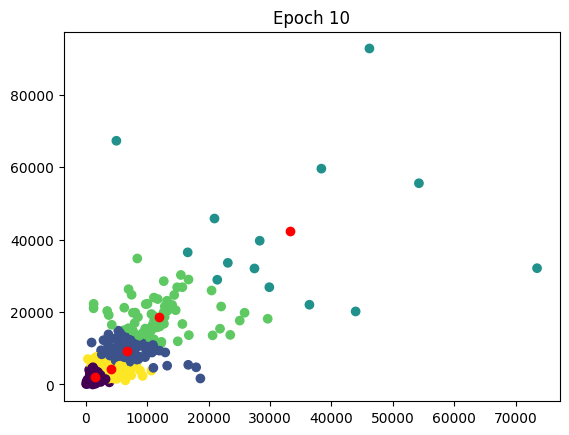

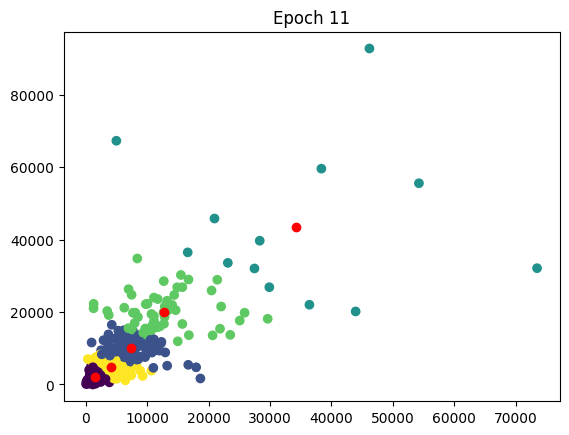

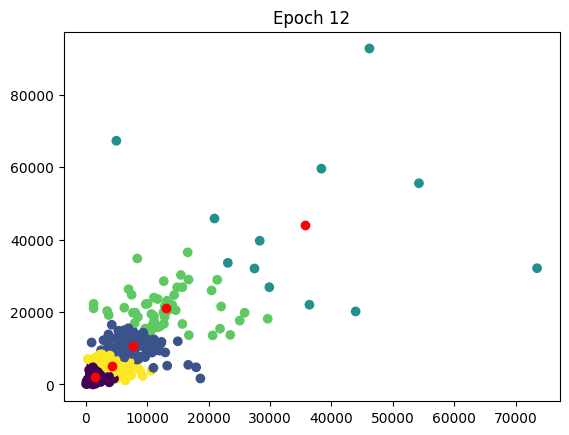

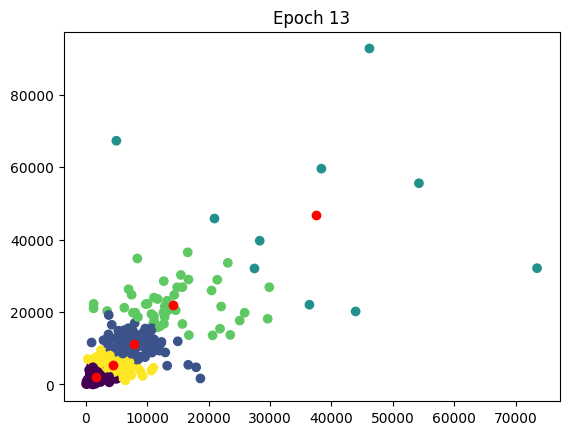

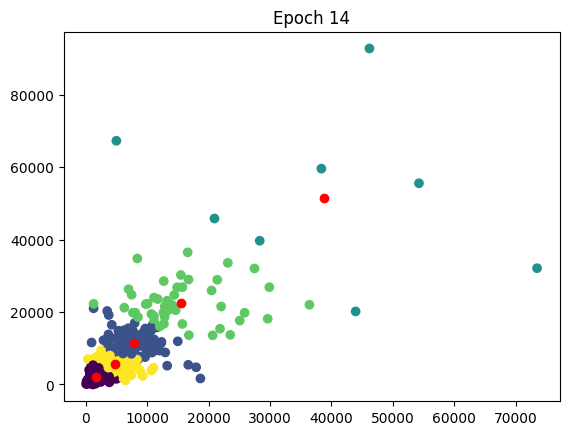

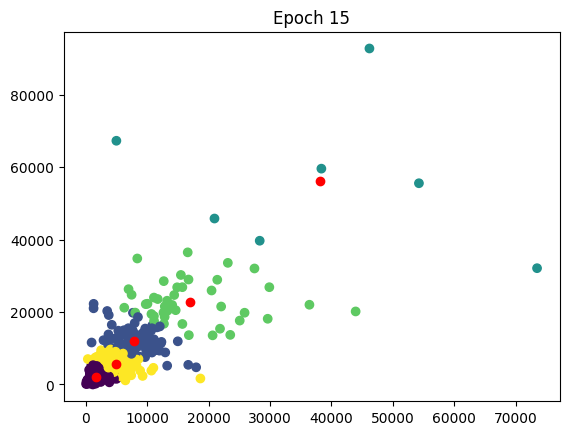

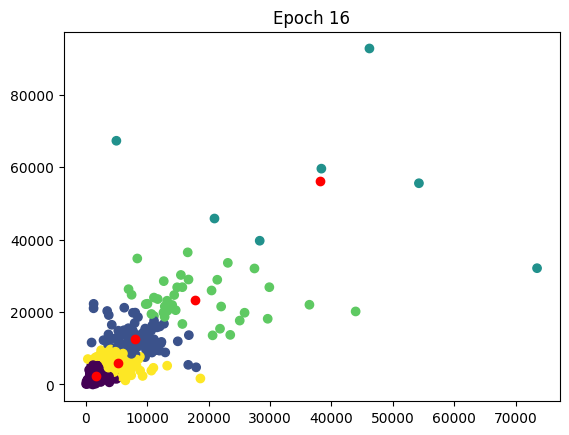

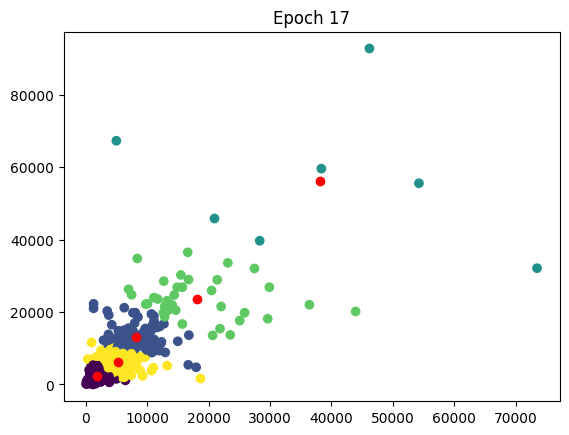

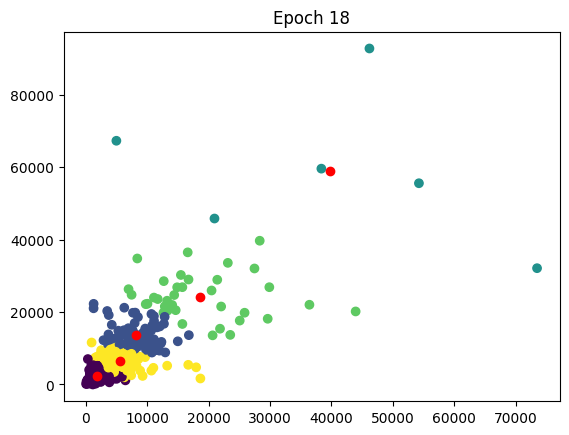

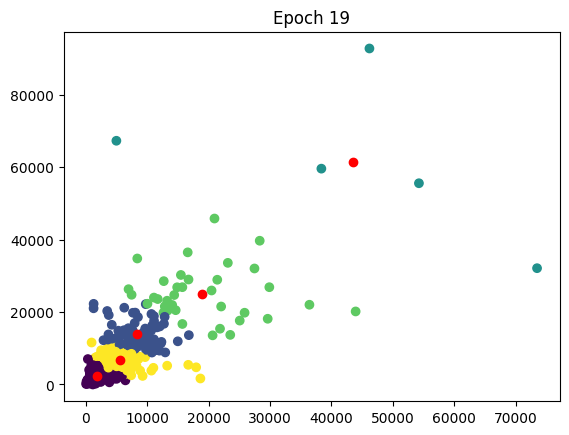

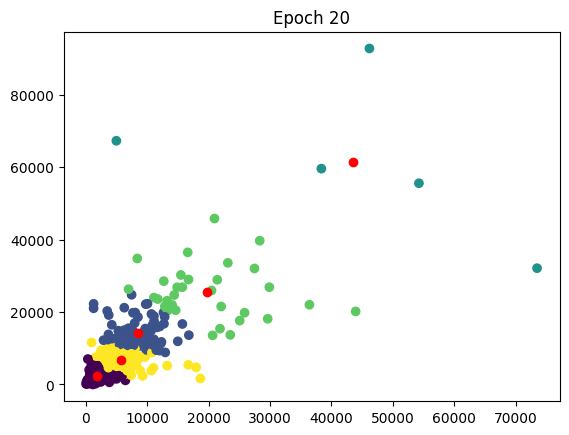

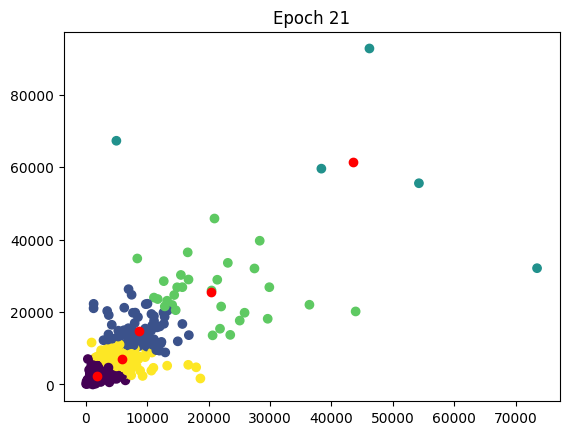

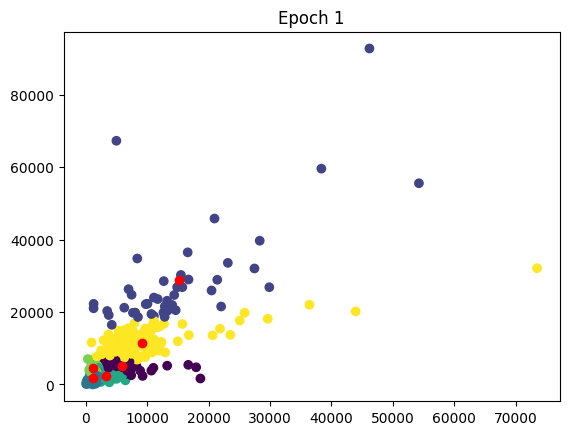

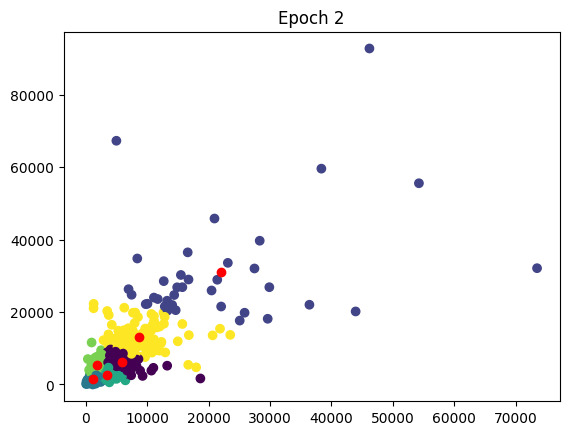

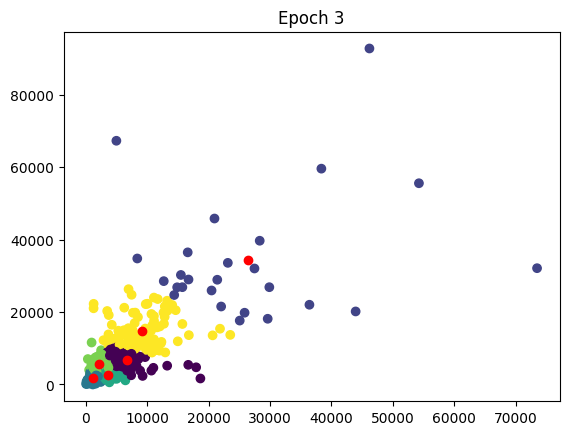

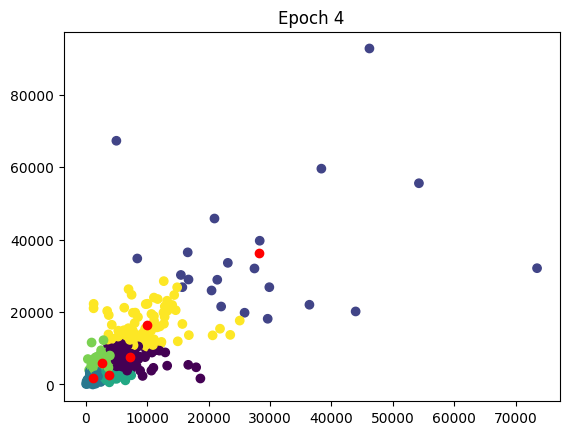

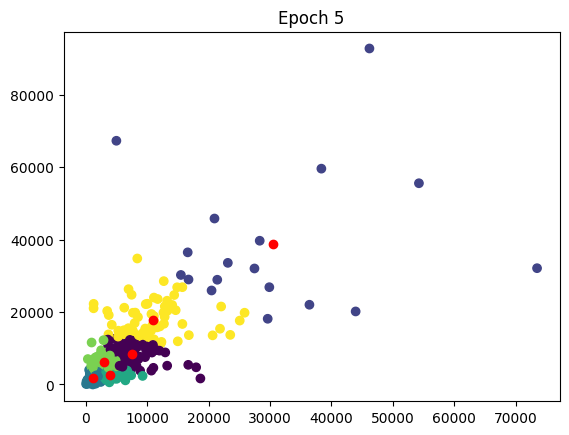

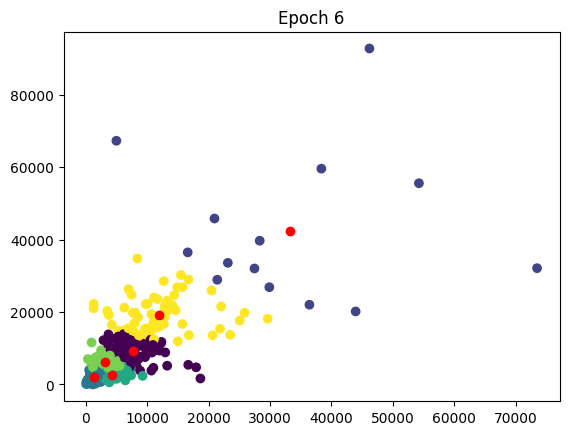

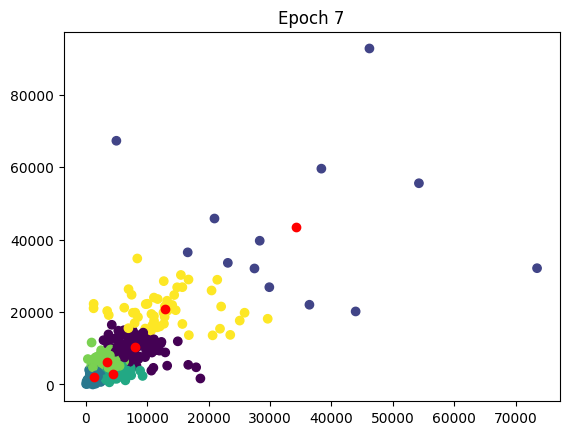

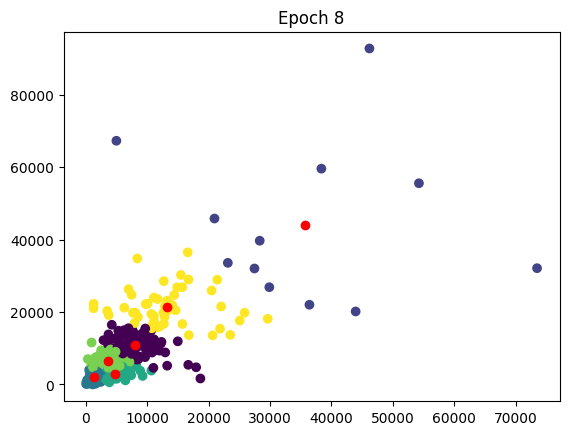

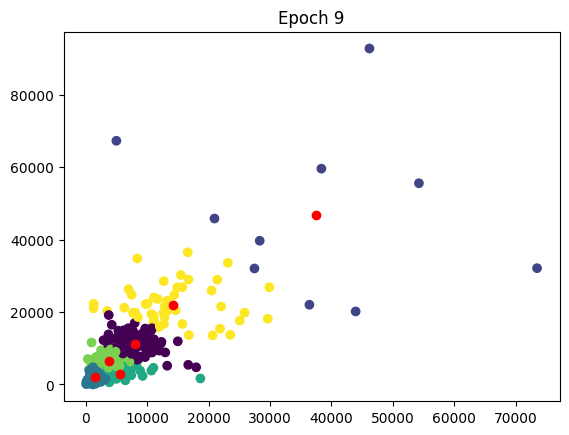

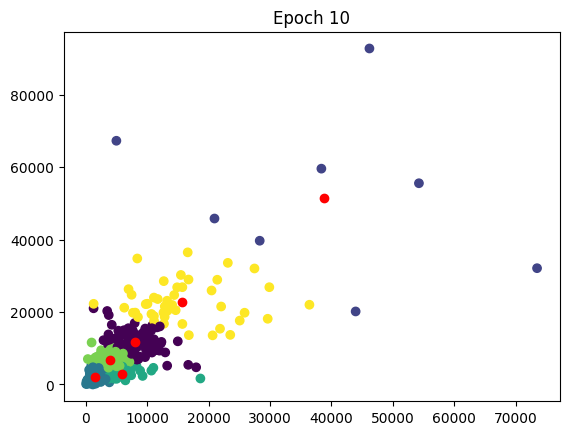

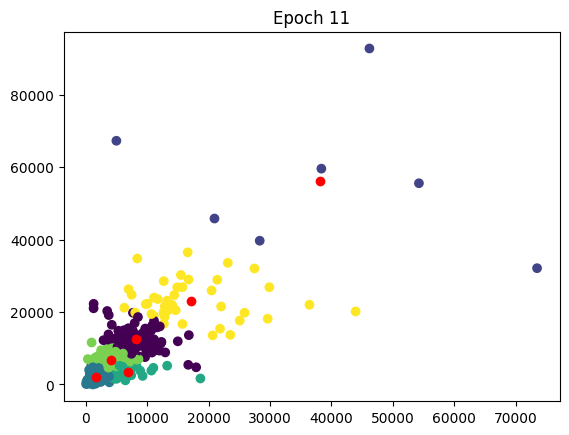

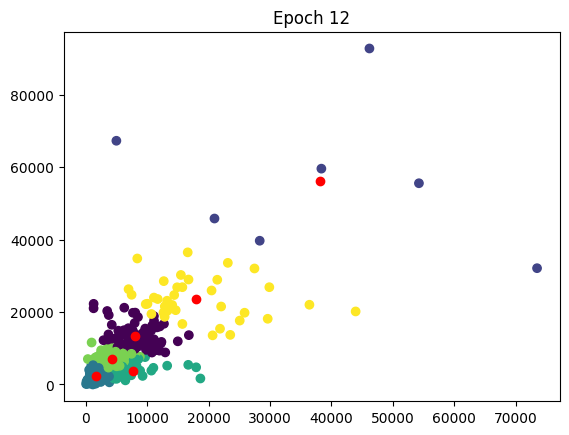

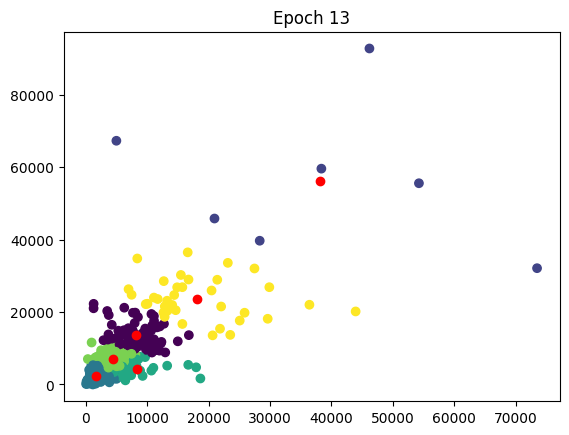

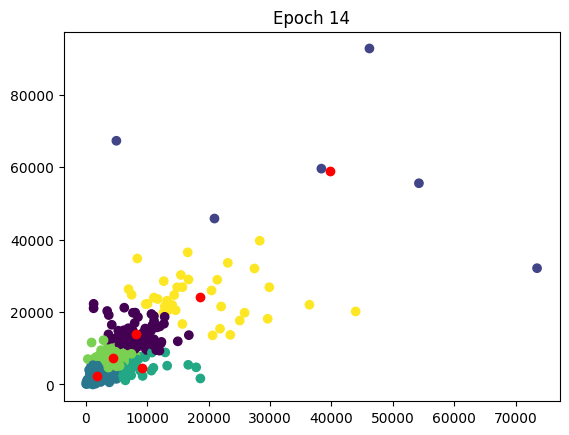

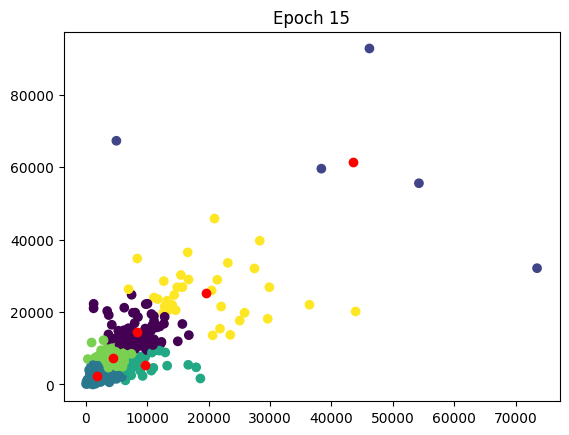

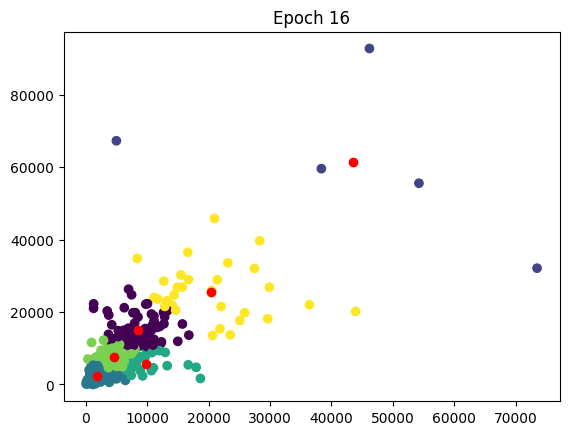

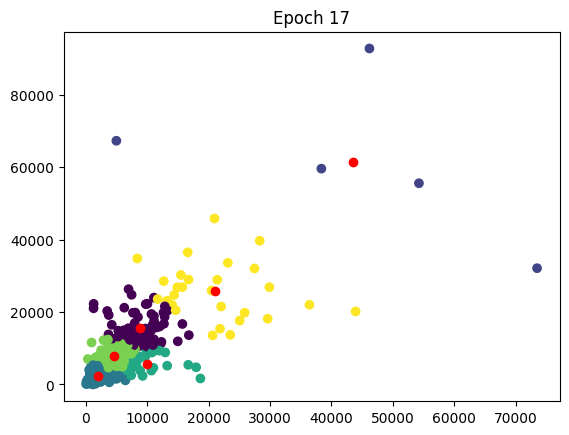

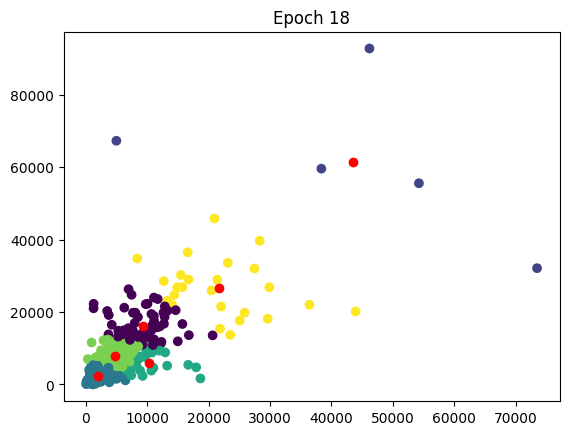

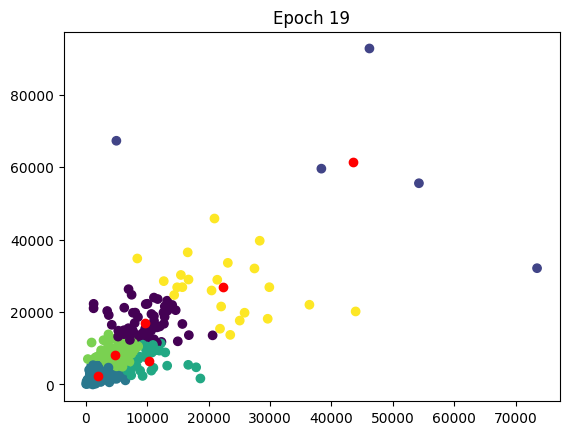

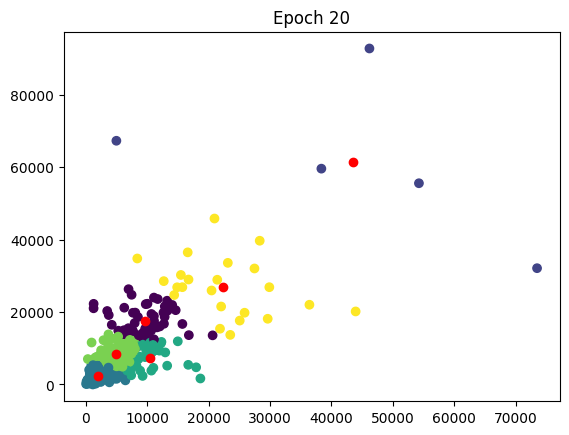

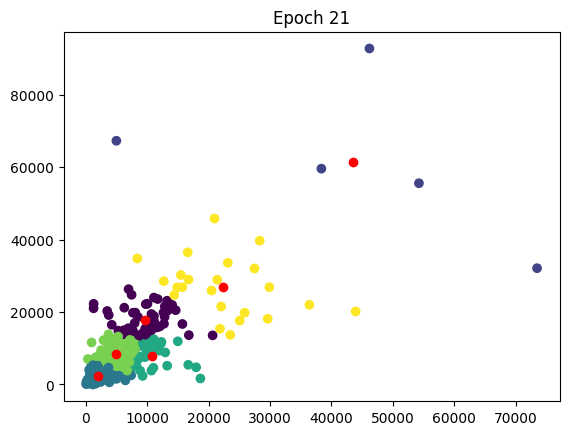

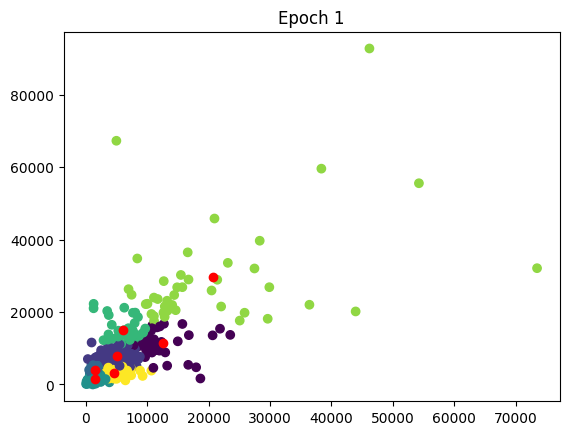

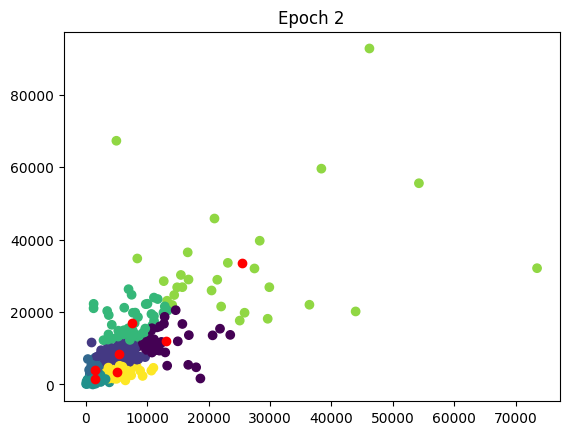

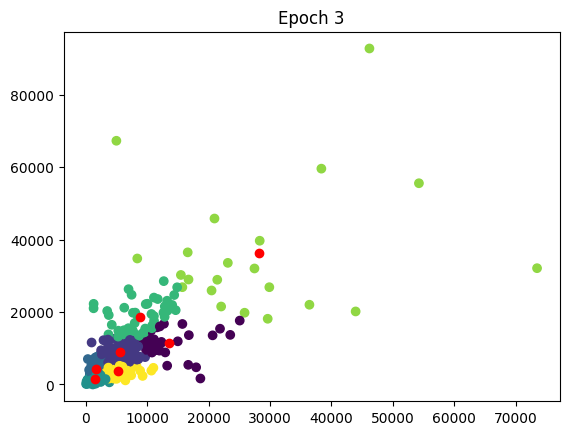

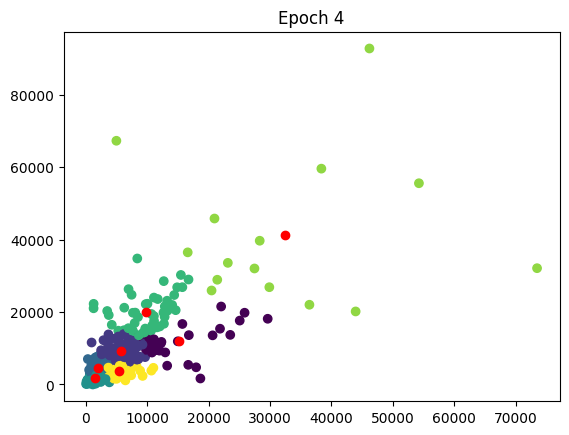

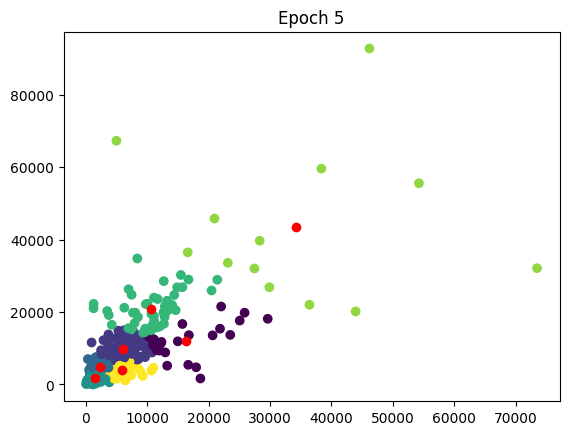

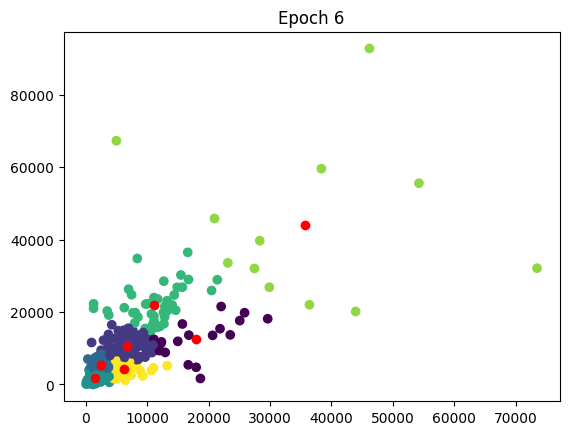

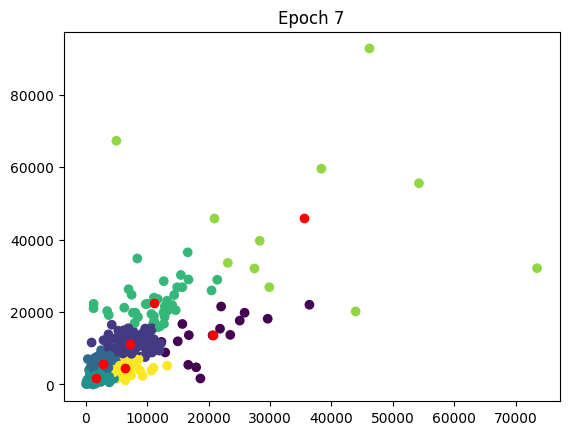

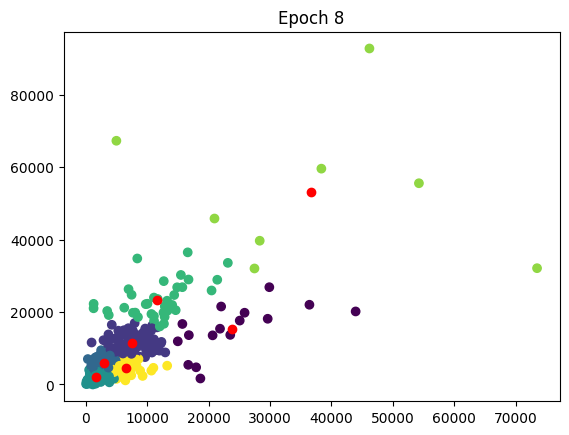

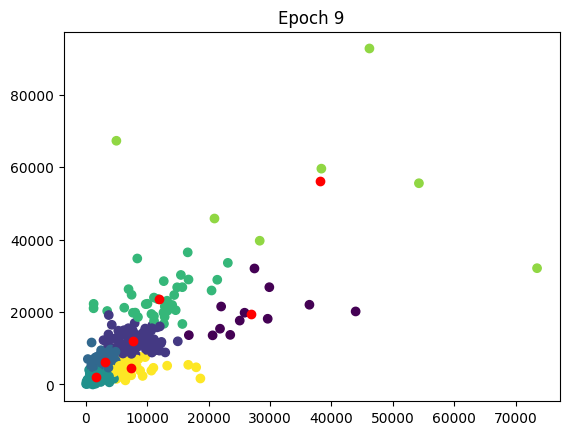

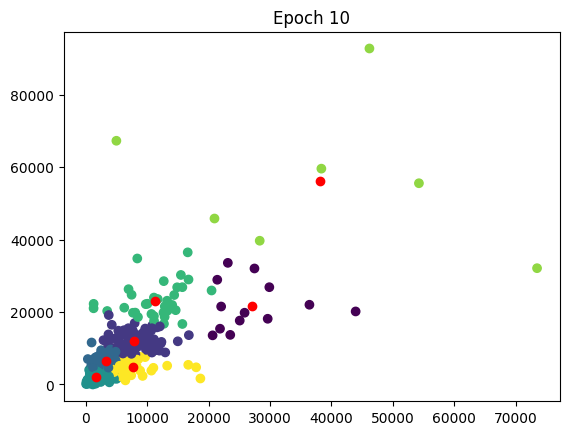

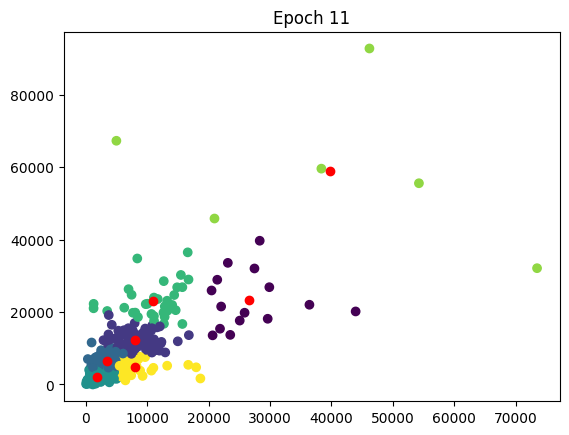

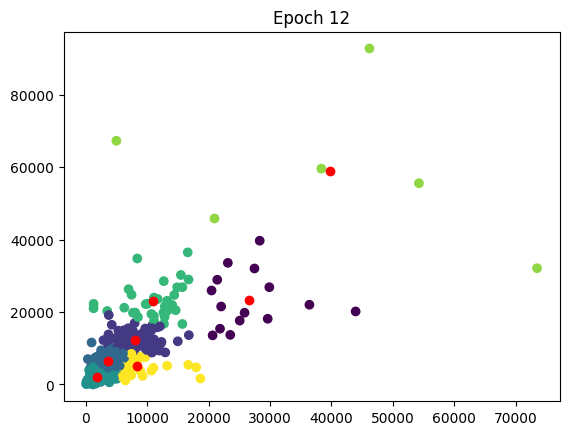

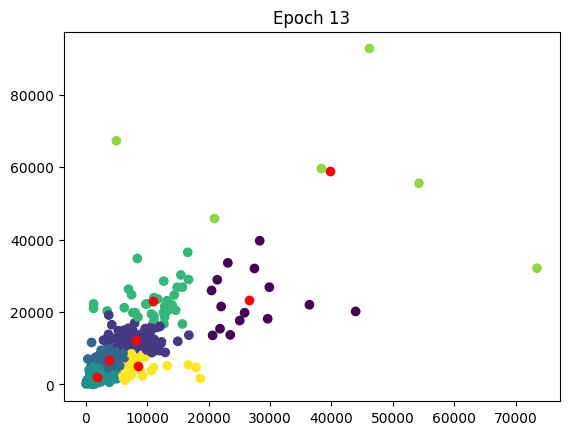

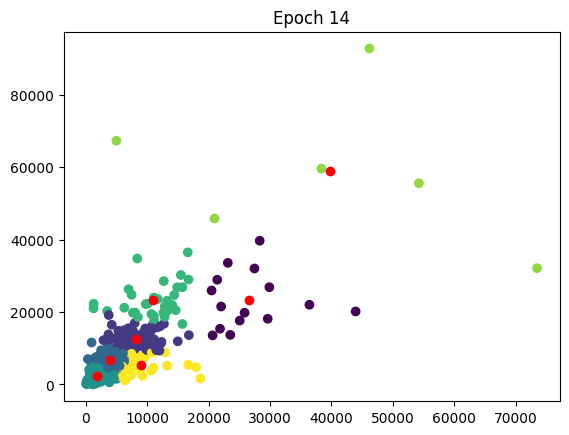

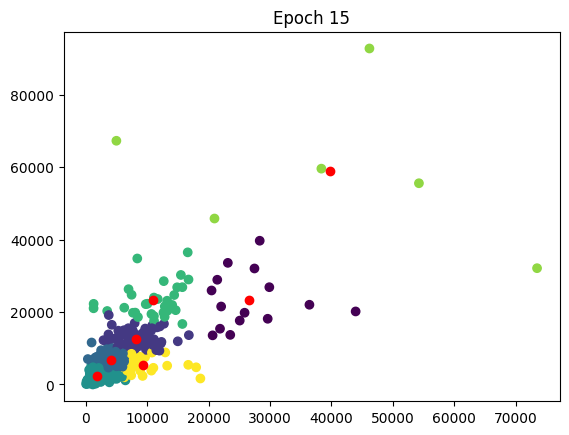

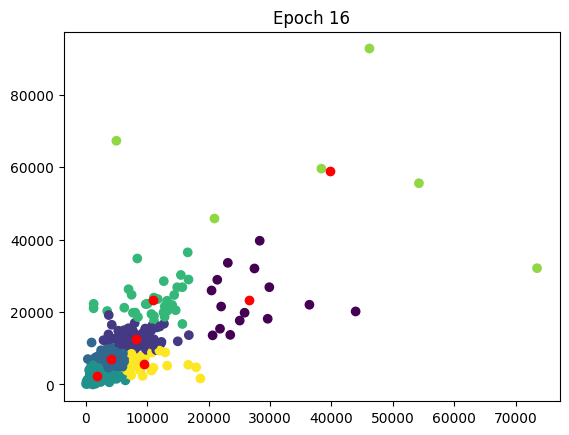

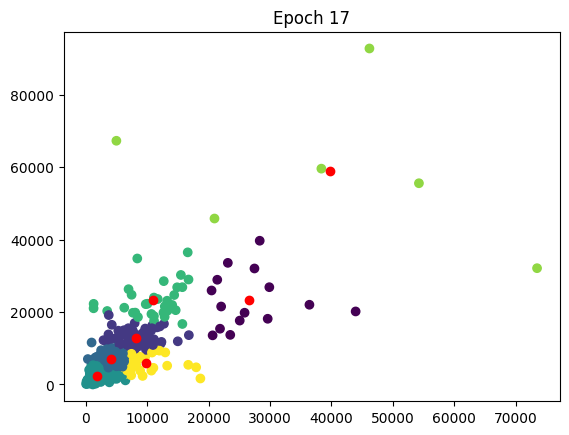

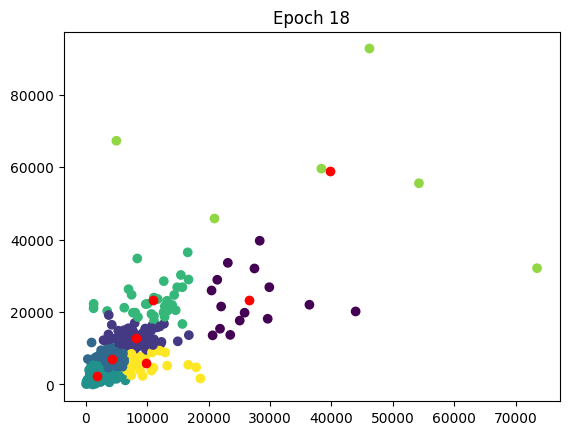

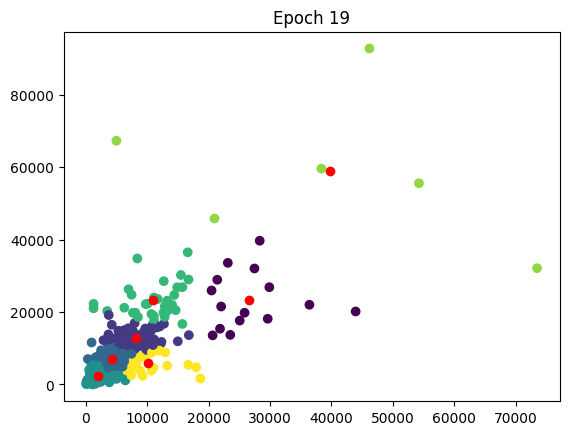

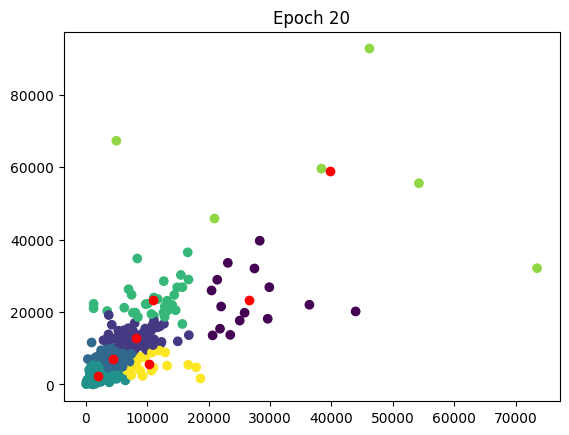

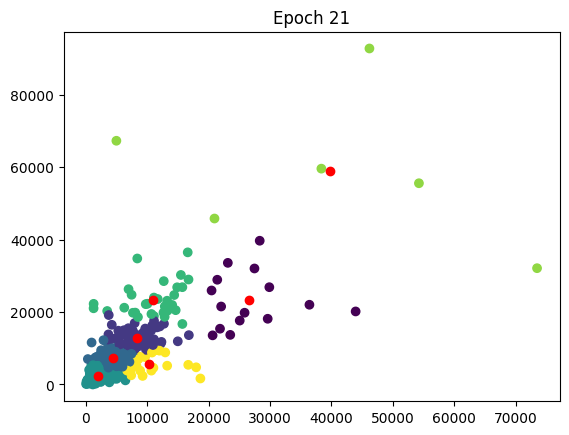

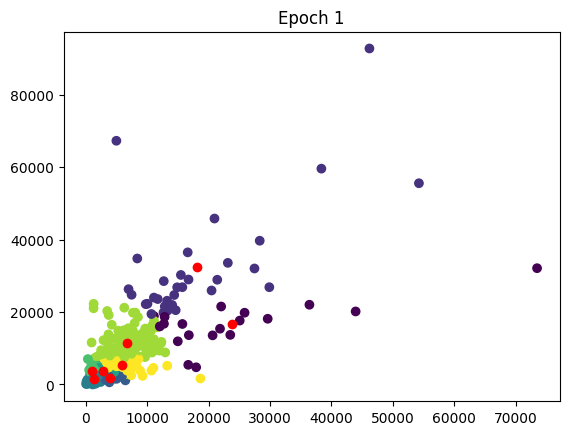

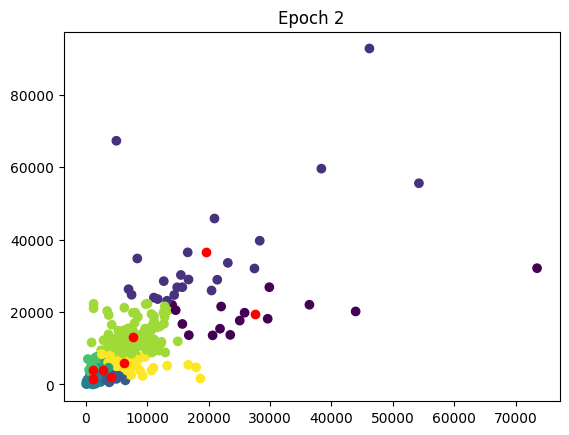

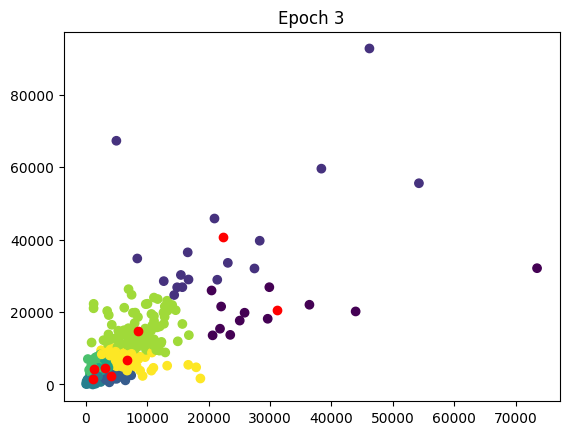

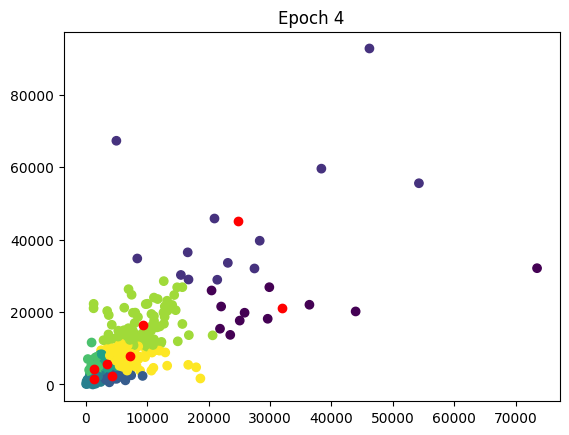

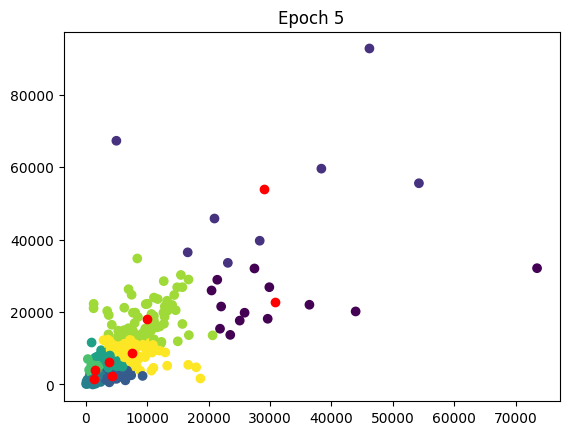

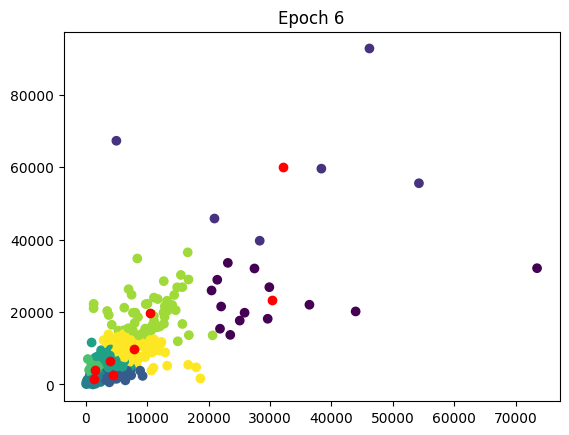

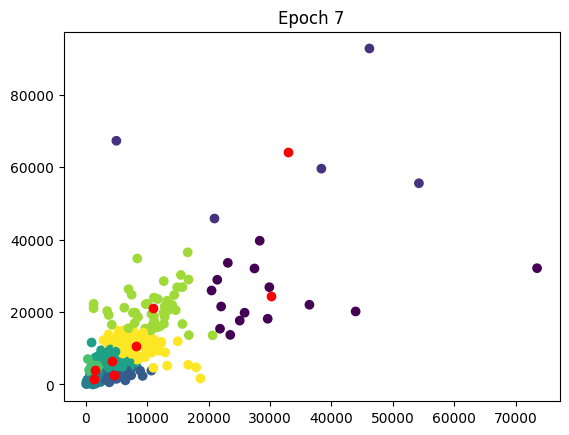

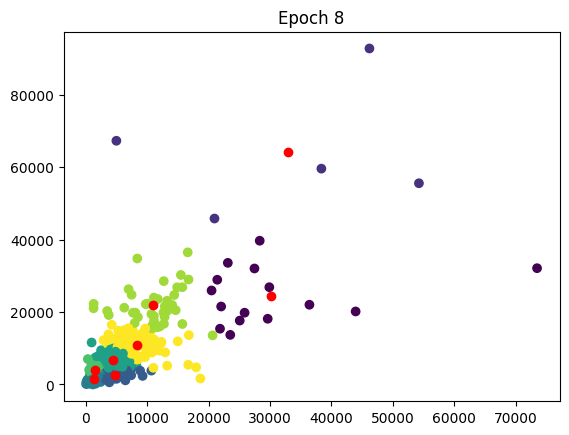

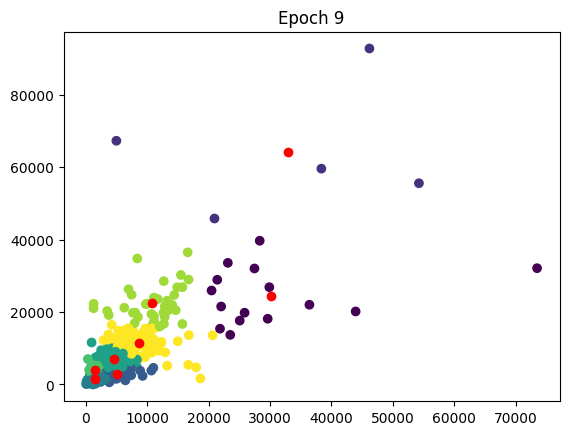

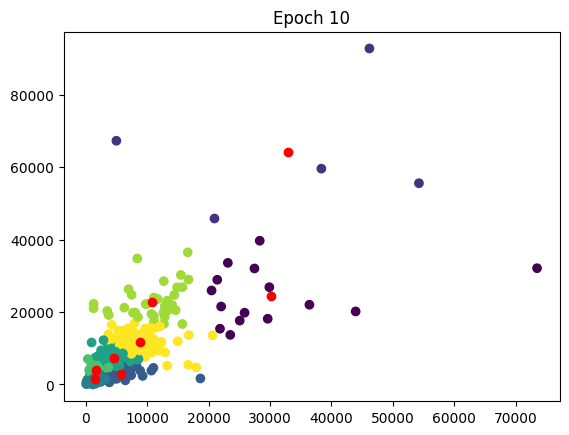

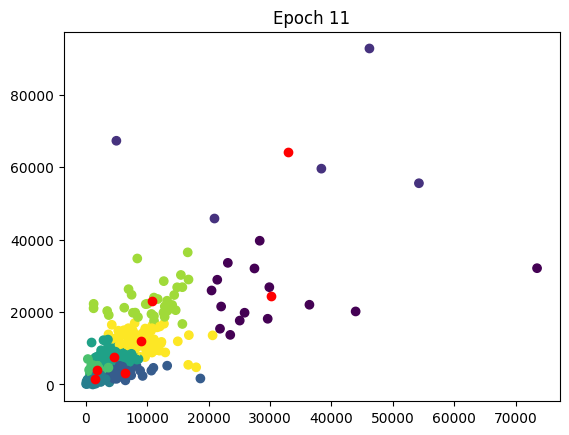

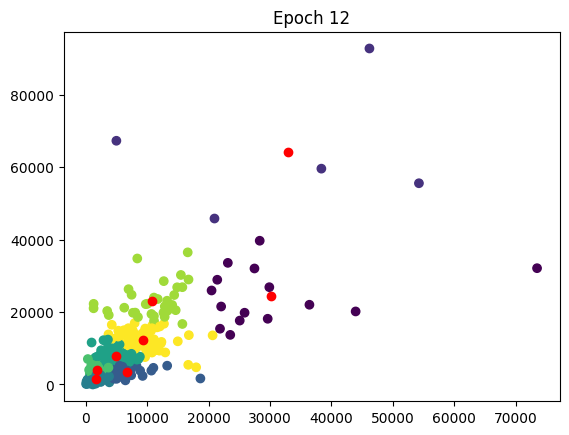

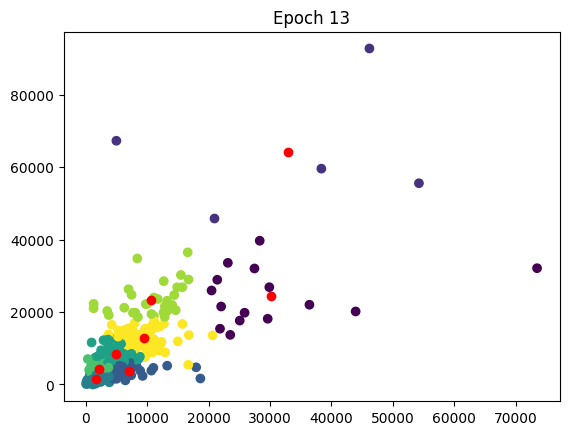

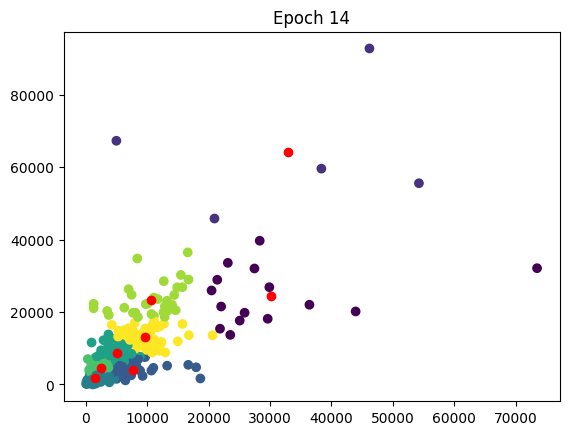

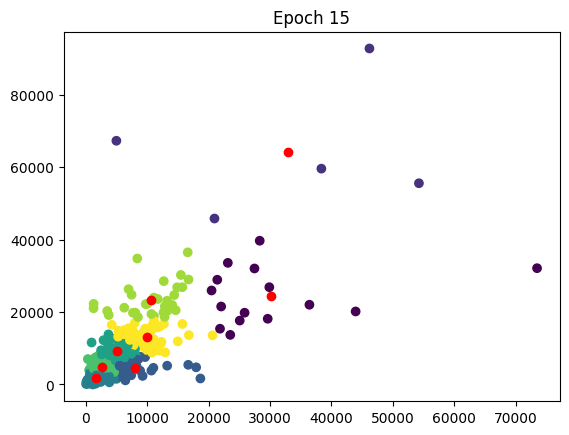

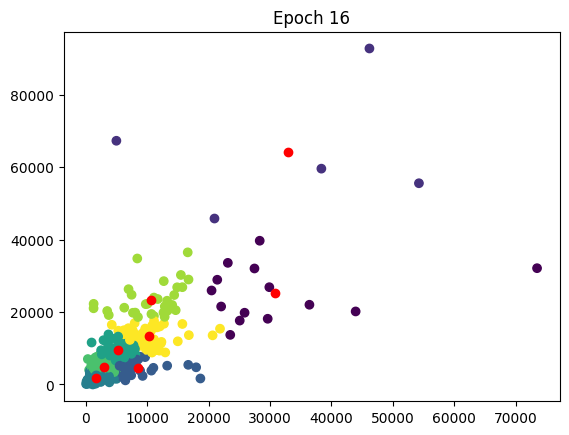

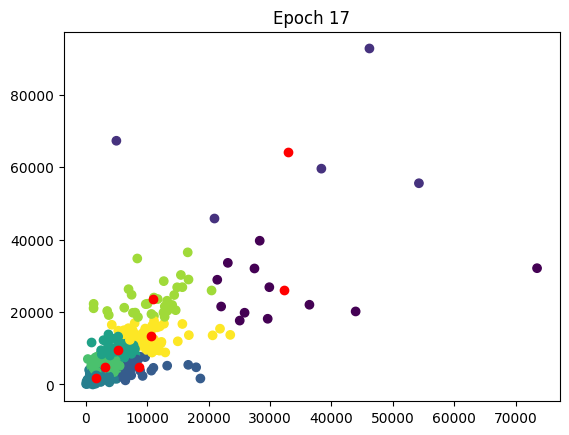

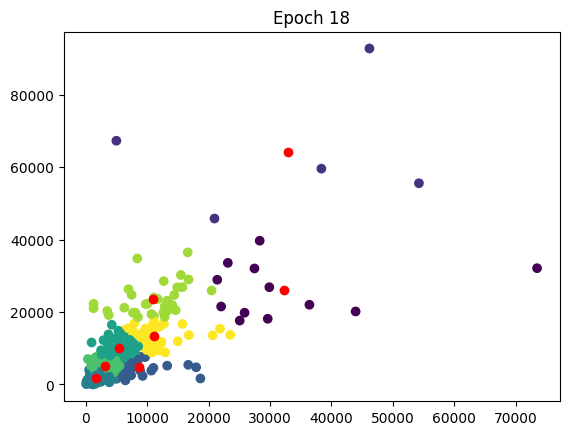

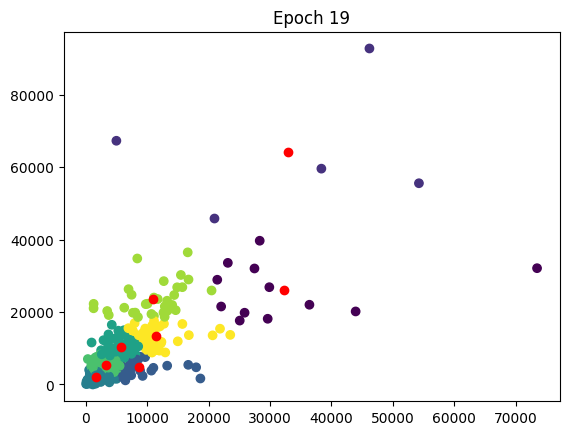

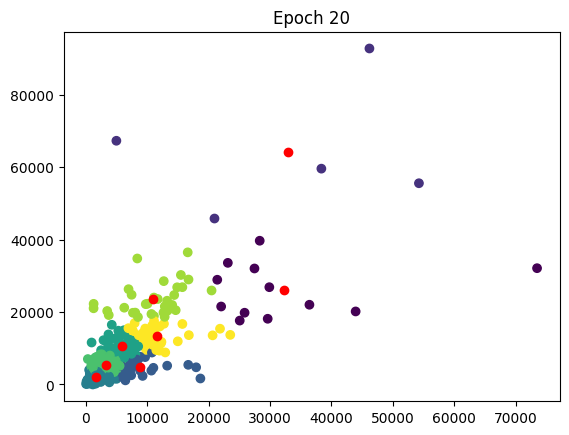

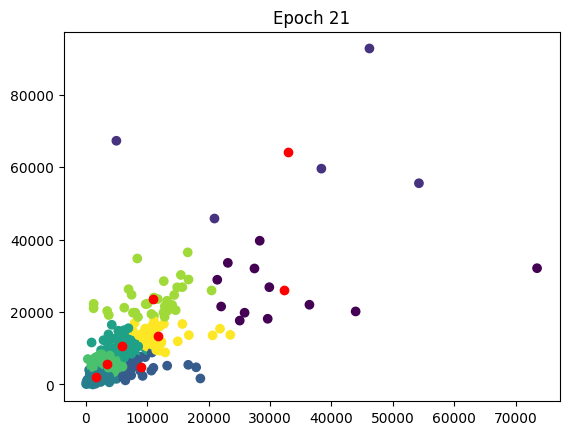

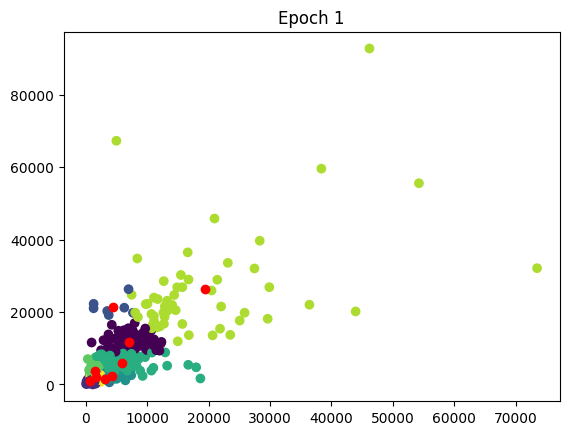

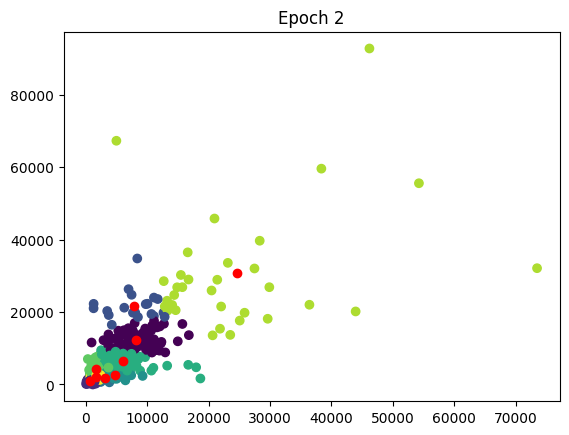

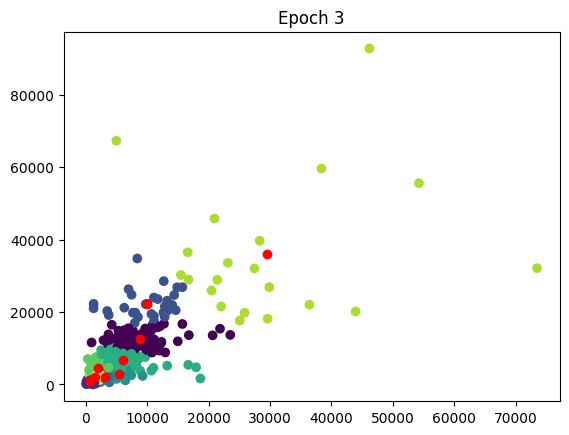

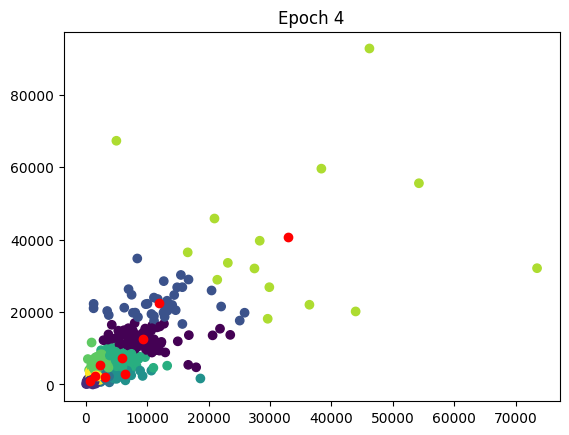

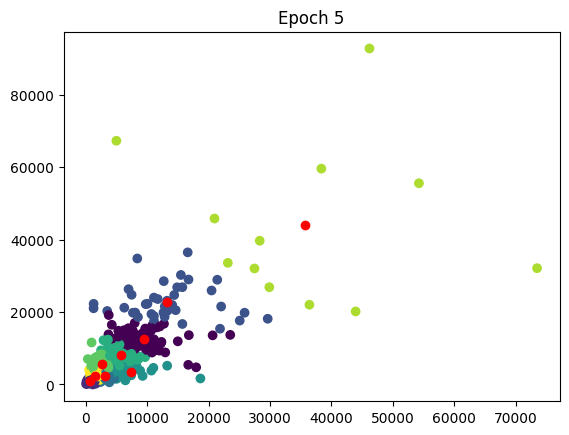

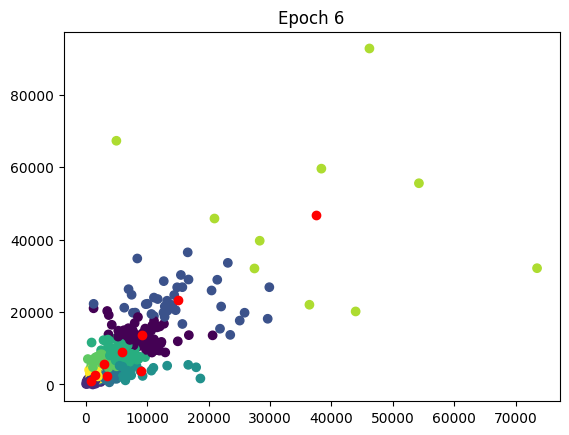

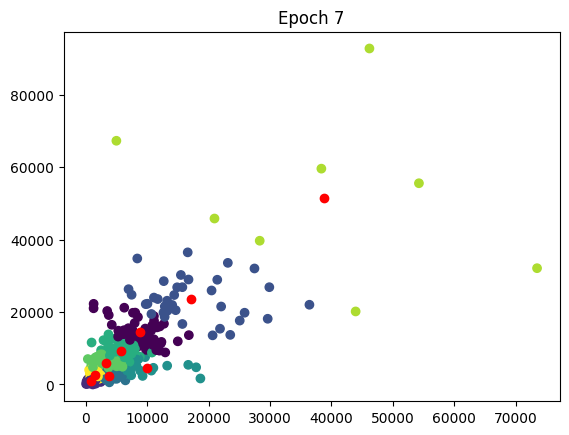

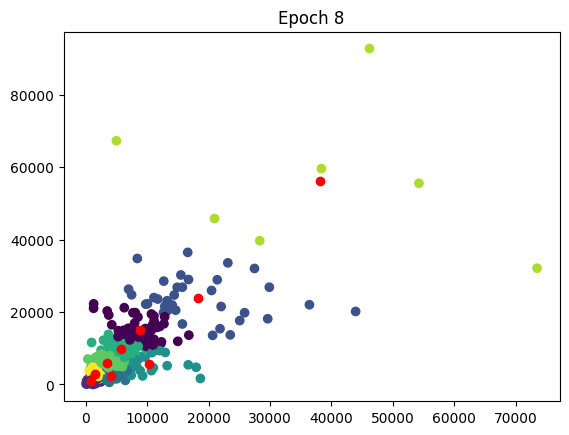

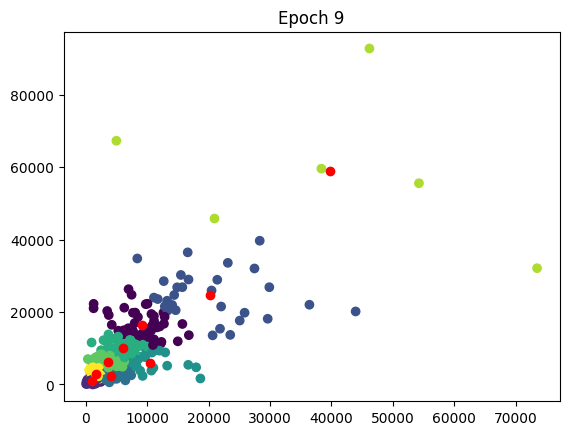

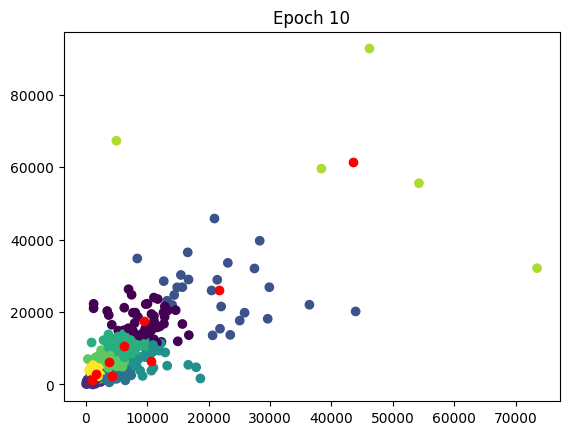

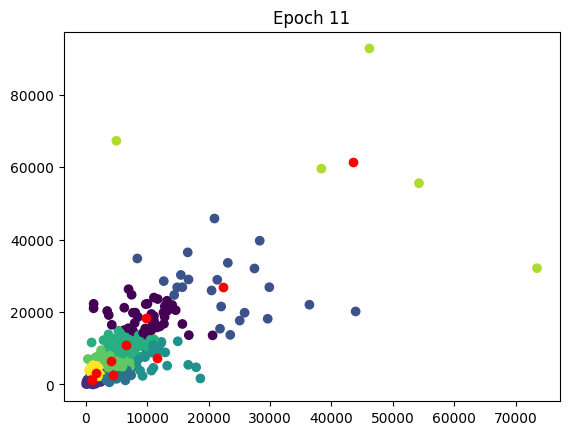

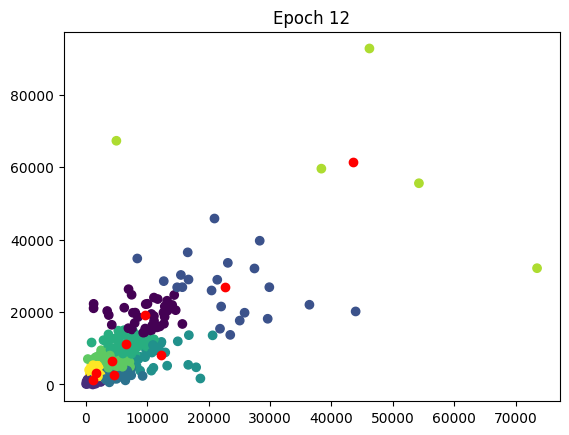

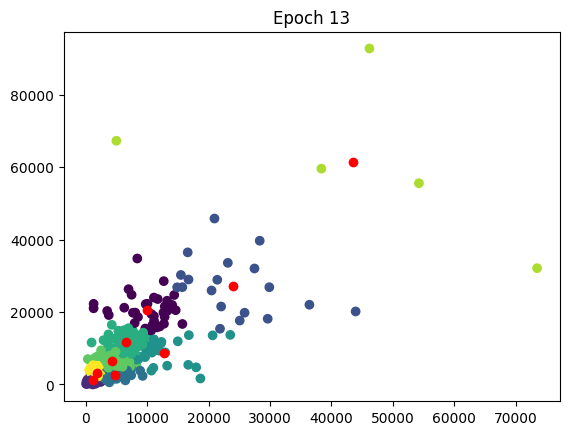

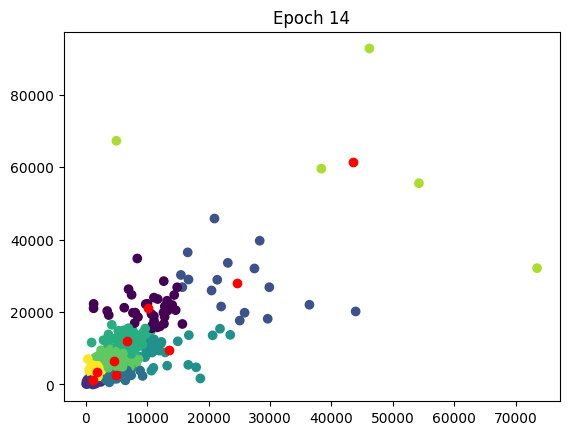

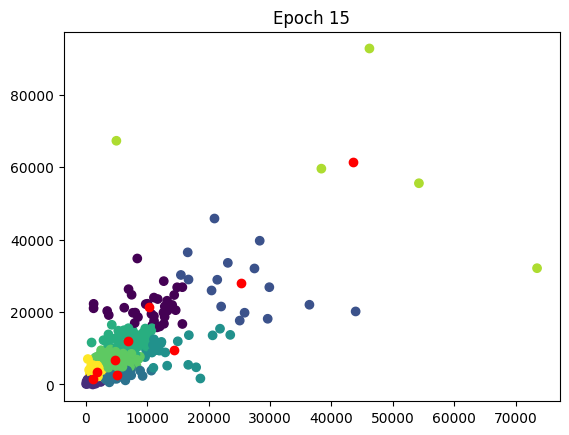

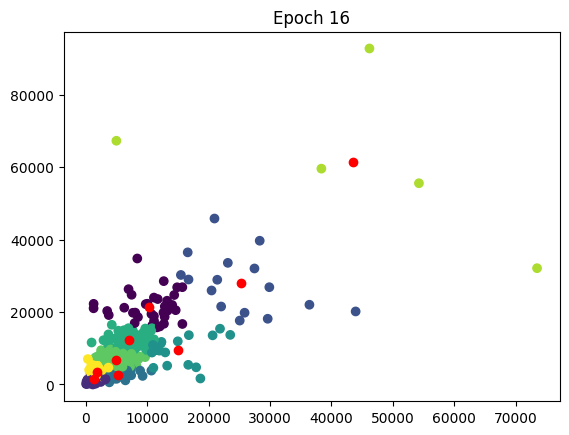

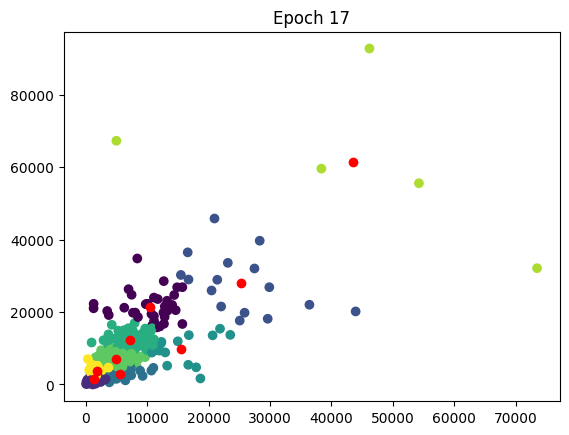

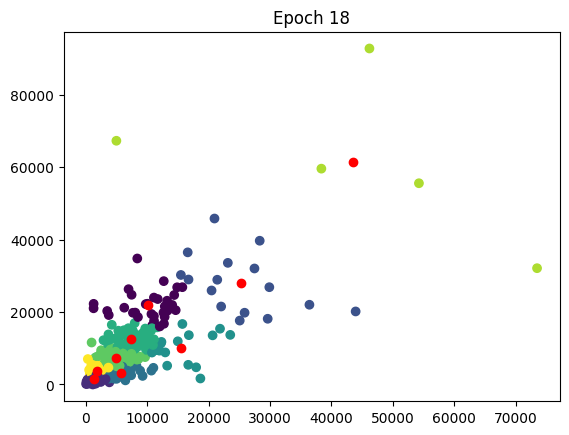

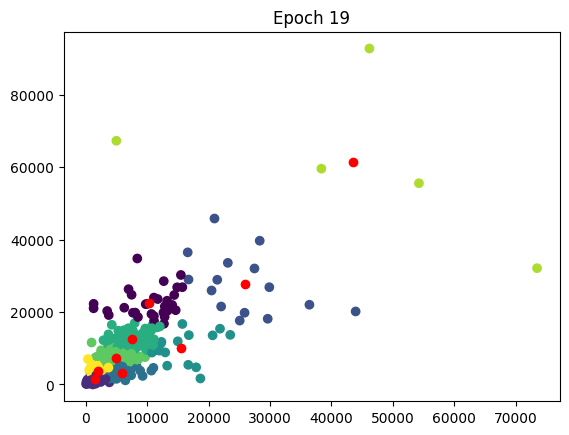

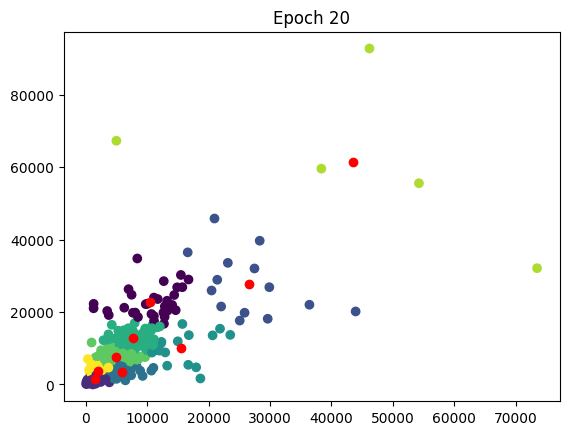

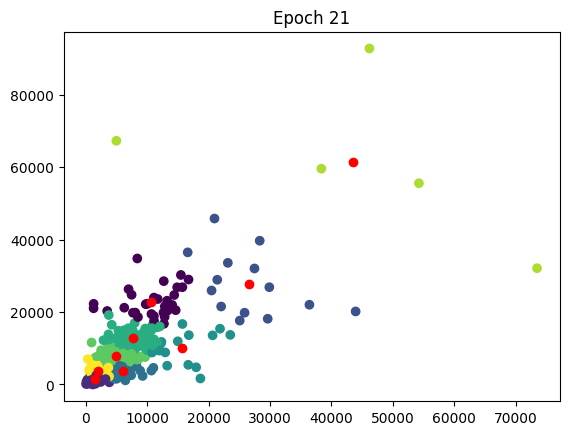

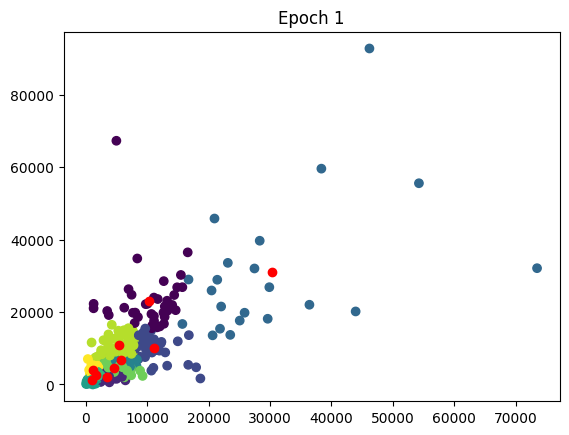

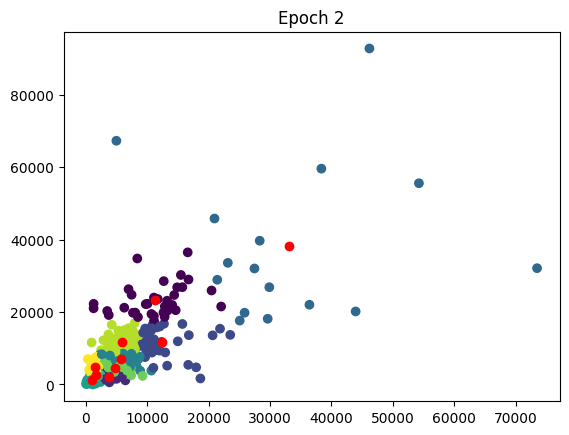

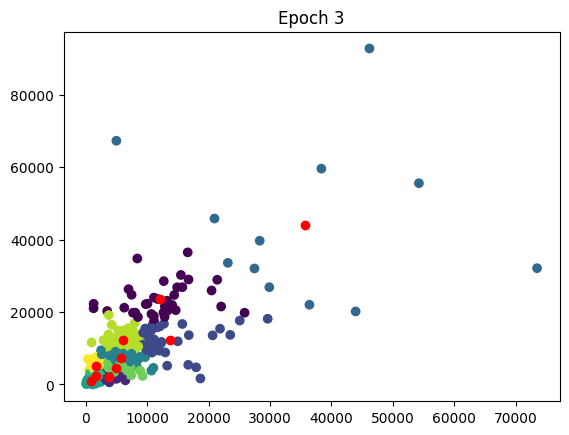

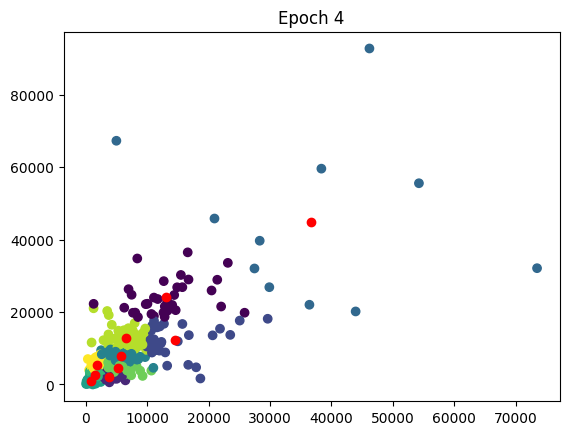

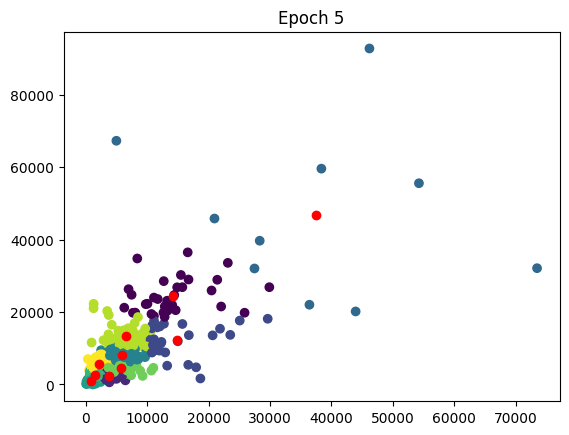

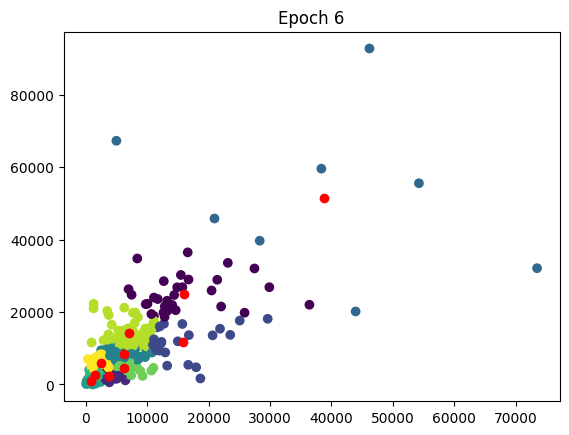

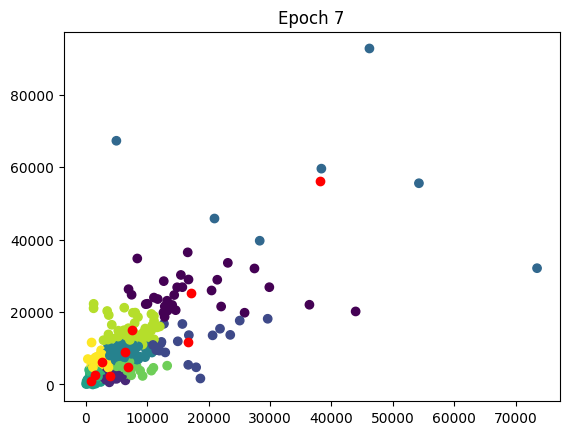

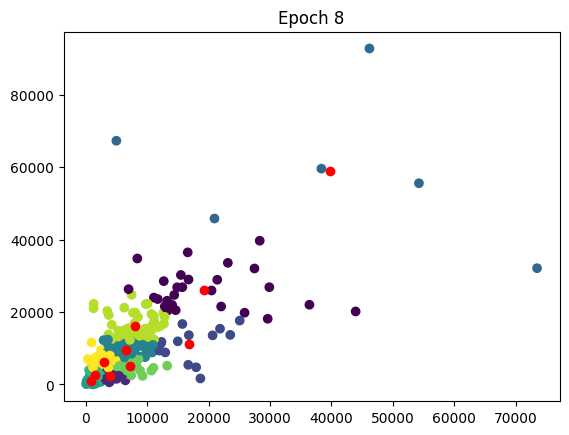

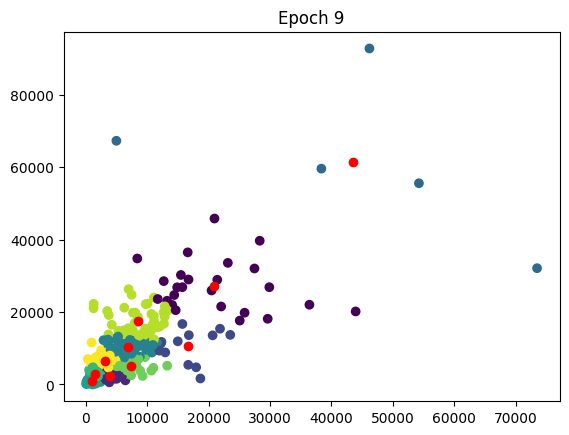

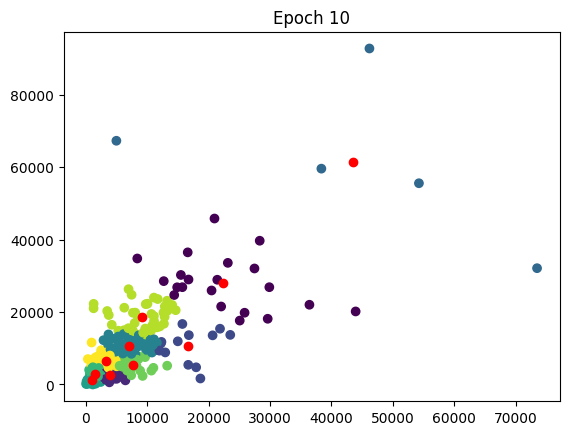

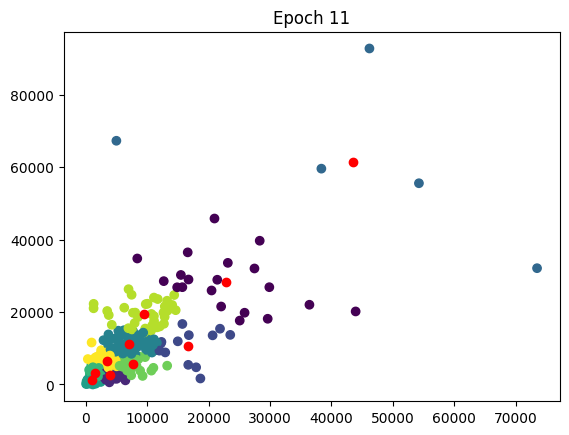

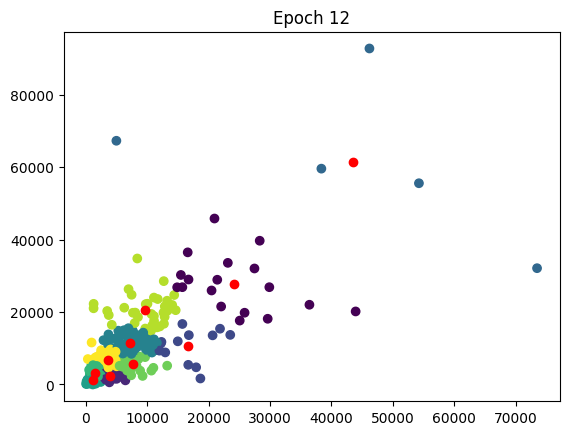

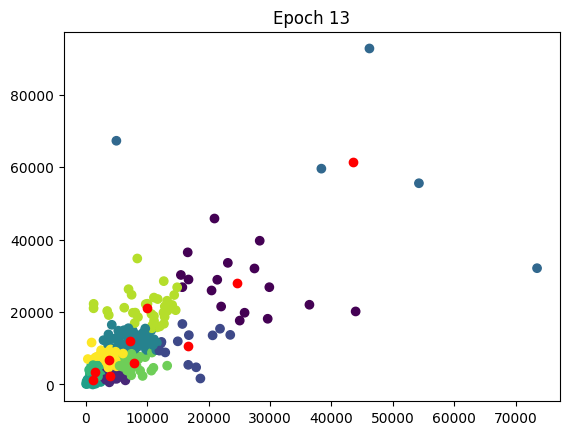

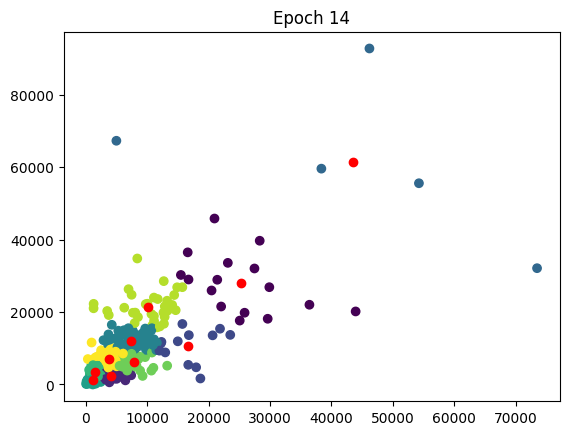

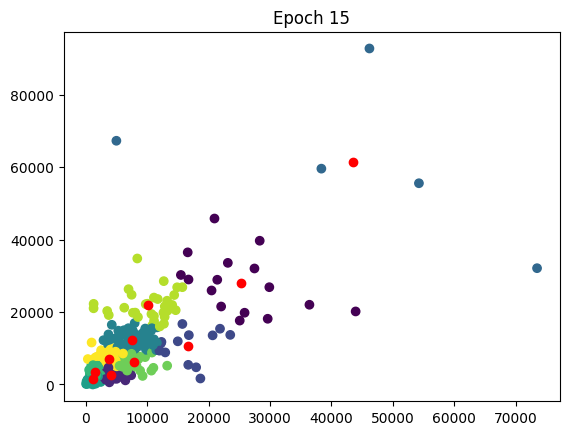

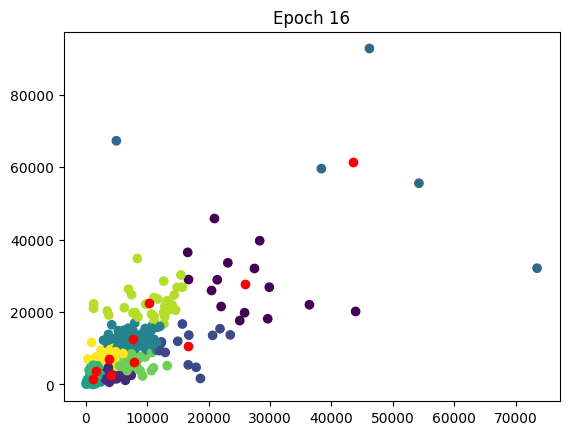

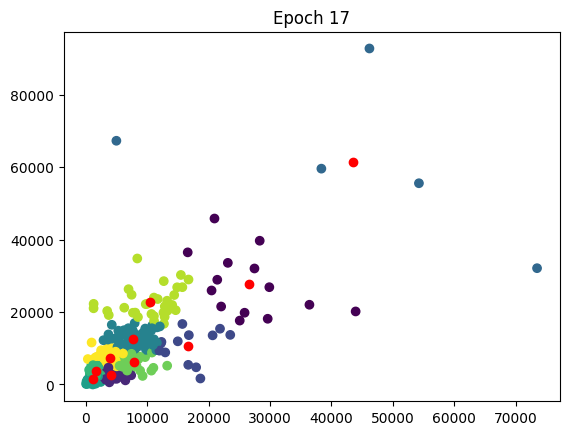

Converged at iteration 18


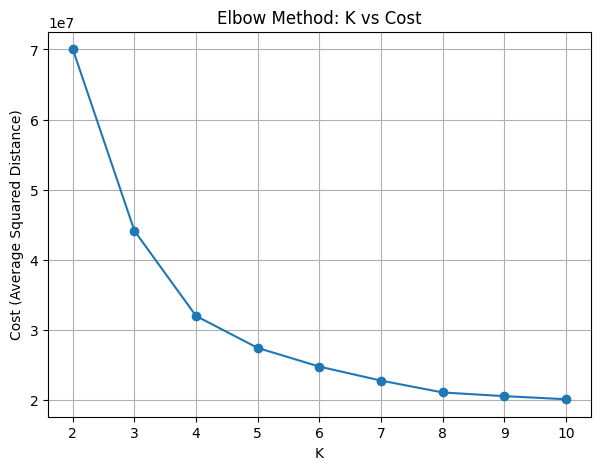

In [4]:
# Task 3: Elbow Method
epochs = 20
Ks = range(2, 11)
costs = []

for K in Ks:
    centroids = df[np.random.choice(m, K, replace=False)]
    exit = 0

    final_centroids, final_clusters = closest_cluster(
        df, centroids, epochs, K, exit
    )

    cost = 0
    for i in range(m):
        assigned_centroid = final_centroids[final_clusters[i]]
        cost += np.linalg.norm(df[i] - assigned_centroid)**2

    cost = cost / m
    costs.append(cost)

plt.figure(figsize=(7,5))
plt.plot(list(Ks), costs, marker='o')
plt.xlabel('K')
plt.ylabel('Cost (Average Squared Distance)')
plt.title('Elbow Method: K vs Cost')
plt.grid(True)
plt.show()
